In [1]:
import torch
from torch import nn
from torch import optim
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from nltk.classify.megam import numpy
from scipy import interp
from itertools import cycle
import time

In [2]:
import numpy as np
import os
import math
import random
import torch
# from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import plotly.graph_objects as go

from sklearn.utils import shuffle
import torch.nn as nn
!pip install torchsummary
import matplotlib.pyplot as plt
from torchsummary import summary
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

You should consider upgrading via the '/Users/pro/Documents/Sklearn/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import seaborn
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torchvision import datasets, transforms

USE_CUDA = True

In [4]:
from sklearn.model_selection import KFold

In [140]:
train_set = pd.read_csv('../capsule_code/data/nc_train_4.csv', sep=' ',header=None,names=['0','1','2','3','4','5','6','label'])
train_set

,0,1,2,3,4,5,6,label
0,-1.296572,-0.688269,-0.831681,-0.412444,-0.307202,0.306243,-0.361374,0
1,-0.064005,-1.456182,-1.231766,-0.985112,-0.349396,-2.416853,-0.477236,3
2,1.168561,-0.578567,0.235212,-1.557780,-0.307202,0.491938,-0.361374,0
3,1.168561,-1.675586,-0.431596,-1.271446,-0.307202,0.627293,-0.399994,7
4,1.168561,-1.675586,-1.098404,1.305561,-0.307202,0.618958,-0.399994,7
...,...,...,...,...,...,...,...,...
11195,-1.296572,1.396065,-1.498489,0.732893,-0.307202,0.455599,-0.399994,11
11196,1.168561,-0.578567,-0.431596,-1.557780,-0.265008,0.498940,-0.322753,13
11197,1.168561,-1.346480,-1.498489,1.305561,-0.307202,0.565950,-0.361374,11
11198,-0.064005,-0.578567,0.902020,-0.985112,-0.222813,0.285573,-0.284132,0


In [141]:
test_set = pd.read_csv('../capsule_code/data/nc_test_4.csv', sep=' ',header=None,names=['0','1','2','3','4','5','6','label'])
test_set

,0,1,2,3,4,5,6,label
0,-1.296572,-1.675586,-1.498489,-1.557780,-0.307202,0.315577,-0.361374,11
1,-1.296572,-1.675586,-1.498489,-1.271446,-0.307202,0.314244,-0.399994,11
2,-1.296572,-1.675586,-1.498489,-1.271446,-0.307202,0.314244,-0.399994,11
3,-1.296572,-1.675586,-1.498489,-0.985112,-0.307202,0.313910,-0.361374,11
4,-1.296572,-1.675586,-1.498489,-0.985112,-0.307202,0.313910,-0.361374,11
...,...,...,...,...,...,...,...,...
2795,1.168561,1.615469,1.435466,0.446558,-0.349396,-0.063482,-0.399994,14
2796,1.168561,1.615469,1.435466,0.732893,-0.349396,-0.062816,-0.399994,14
2797,1.168561,1.615469,1.435466,1.019227,-0.349396,-0.062816,-0.399994,14
2798,1.168561,1.615469,1.435466,1.305561,-0.349396,-0.062482,-0.399994,14


In [142]:
# 划分训练集和验证集
train_set = shuffle(train_set)
all_train_data = shuffle(train_set)
train_data = all_train_data[['0','1','2','3','4','5','6']]
train_label = all_train_data['label']

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_label, test_size = 0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [143]:
# 测试集
test_set = shuffle(test_set)
all_test_data = shuffle(test_set)
X_test = all_test_data[['0','1','2','3','4','5','6']]
y_test = all_test_data['label']

In [144]:
X_train, X_test, X_valid = np.array(X_train).reshape(-1, 7), np.array(X_test).reshape(-1, 7), np.array(X_valid).reshape(-1, 7)
y_train, y_test, y_valid = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1), np.array(y_valid).reshape(-1, 1)

In [145]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train, X_valid, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_valid), torch.FloatTensor(X_test)
y_train, y_valid, y_test = torch.FloatTensor(y_train), torch.FloatTensor(y_valid), torch.FloatTensor(y_test)

In [146]:
from torch.utils.data import Dataset, DataLoader

class Dataset(Dataset):
  # 'Characterizes a dataset for PyTorch'
    def __init__(self, data, labels):
        # 'Initialization'
        self.labels = labels
        self.data = data

    def __len__(self):
        # 'Denotes the total number of samples'
        return len(self.data)

    def __getitem__(self, index):
        # 'Generates one sample of data'
        # Select sample
        return self.data[index], self.labels[index]

In [147]:
config = {
    'batch_size': 100,
    'shuffle': True,
    'drop_last': False
}

In [148]:
train_set = Dataset(X_train, y_train)
train_loader = DataLoader(
    train_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

validation_set = Dataset(X_valid, y_valid)
validation_loader = DataLoader(
    validation_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

test_set = Dataset(X_test, y_test)
test_loader = DataLoader(
    test_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

In [179]:
class CNN(nn.Module):
    
    def __init__(self):
        '''Constructs the ConvLayer with a specified input and output size.
           param in_channels: input depth of an image, default value = 1
           param out_channels: output depth of the convolutional layer, default value = 256
           '''
        super(CNN, self).__init__()

        # defining a convolutional layer of the specified size
        # torch.Size([100, 64, 3])
        self.conv1 = nn.Conv1d(in_channels=7, out_channels=64, 
                              kernel_size=2, stride=1, padding=1)
        # torch.Size([100, 128, 5])
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, 
                              kernel_size=2, stride=1, padding=1)
        # torch.Size([100, 256, 7])
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, 
                              kernel_size=2, stride=1, padding=1)
        # torch.Size([100, 512, 9])
        self.conv4 = nn.Conv1d(in_channels=256, out_channels=512, 
                              kernel_size=2, stride=1, padding=1)
        
        self.fc1 = nn.Linear(512*5, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 16)
#         self.conv5 = nn.Conv1d(in_channels=512, out_channels=1024, 
#                               kernel_size=3, stride=1, padding=2)
#         self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input to the layer; an input image
           return: a relu-activated, convolutional layer
           '''
        # 将 ReLu 激活应用于 conv 层的输出
        features = F.relu(self.conv1(x))
#         print(features.shape)
        features = F.relu(self.conv2(features))
        features = F.relu(self.conv3(features))
        features = F.relu(self.conv4(features))
        features = features.view(-1, 512*5)
        features = F.relu(self.fc1(features))
        features = F.relu(self.fc2(features))
        features = F.relu(self.fc3(features))
        features = self.fc4(features)
#         features = self.conv5(features)
#         features = F.relu(features) # will have dimensions (batch_size, 20, 20, 256)
        return features

In [180]:
cnn = CNN()
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    output = cnn(batch_data)

In [181]:
output.shape

torch.Size([100, 16])

In [175]:
cnn

CNN(
  (conv1): Conv1d(7, 64, kernel_size=(2,), stride=(1,), padding=(1,))
  (pool1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=True)
  (conv2): Conv1d(64, 128, kernel_size=(2,), stride=(1,), padding=(1,))
  (pool2): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=True)
  (conv3): Conv1d(128, 256, kernel_size=(2,), stride=(1,), padding=(1,))
  (pool3): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=True)
  (conv4): Conv1d(256, 512, kernel_size=(2,), stride=(1,), padding=(1,))
  (pool4): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=True)
  (fc1): Linear(in_features=2560, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=16, bias=True)
)

In [153]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
def One_hot(labels):
    num_class=16
    lb=LabelBinarizer().fit(np.array(range(num_class)))
    labels=lb.transform(labels)
    return labels

In [154]:
criterion = nn.CrossEntropyLoss()  #使用交叉熵作为损失函数
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
num_epochs = 50
num_classes = 16

In [155]:
def train(cnn, criterion, optimizer, 
          n_epochs):
    '''Trains a capsule network and prints out training batch loss statistics.
       Saves model parameters if *validation* loss has decreased.
       param capsule_net: trained capsule network
       param criterion: capsule loss function
       param optimizer: optimizer for updating network weights
       param n_epochs: number of epochs to train for
       param print_every: batches to print and save training loss, default = 100
       return: list of recorded training losses
       '''

    # track training loss over time
    train_losses = []
    valid_losses = []
    trainAcc1, trainAcc2, trainAcc3, trainAcc4, trainAcc5 = [], [], [], [], []
    valAcc1, valAcc2, valAcc3, valAcc4, valAcc5 = [], [], [], [], []
    trainPre, trainRecall, trainf1 = [],[],[]
    valPre, valRecall, valf1 = [],[],[]
    # one epoch = one pass over all training data 
    for epoch in range(1, n_epochs+1):
        print("-------第 {} 轮训练开始-------".format(epoch))
        '''
        使用训练集训练
        '''
        # initialize training loss
        train_loss = 0.0
        train_acc = 0.0
        train_accs = []
        cnn.train() # set to train mode
        train_preds = []
        train_trues = []
        correct_5 = 0.0
        correct_4 = 0.0
        correct_2 = 0.0
        correct_3 = 0.0
        correct_1 = 0.0
        count = 0
        train_acc_1, train_acc_2, train_acc_3, train_acc_4, train_acc_5 = 0.0, 0.0 ,0.0, 0.0, 0.0
        # get batches of training image data and targets
        for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
        
#             print("batch_labels:", batch_labels)
            batch_data = batch_data.unsqueeze(0)
            batch_data = batch_data.permute(1,2,0)
            batch_labels = batch_labels.squeeze()
#             batch_labels = One_hot(batch_labels)
            # 转tensor，batch_labels: torch.Size([32, 16])
            batch_labels = batch_labels.type(torch.LongTensor)
            
            # zero out gradients
            optimizer.zero_grad()
            # get model outputs
            # logits为输出的各标签概率值
            logits = cnn(batch_data)

            # calculate loss
            loss = criterion(logits, batch_labels)
#             loss = CapsuleLoss(batch_data, batch_labels, logits, reconstruction)
#             loss = CNNLoss(batch_data, batch_labels, logits, reconstruction)
            # perform backpropagation and optimization
            loss.backward()
            optimizer.step()

            train_loss += loss.item() # accumulated training loss
            
            batch_labels = One_hot(batch_labels)
            batch_labels = torch.from_numpy(batch_labels)
            # 根据概率值对标签进行排序
            # 计算topk准确率，k=1-5
            _, pred = logits.topk(5, 1, largest=True, sorted=True)
            _, labels = torch.max(batch_labels.data.cpu(), 1)
            labels = labels.view(labels.size(0), -1).expand_as(pred)
            count += labels.shape[0]
            correct = pred.eq(labels).float()
#             print("correct:", correct)
            correct_5 += correct[:, :5].sum()
#             print("correct_5:", correct_5)
            correct_4 += correct[:, :4].sum()
#             print("correct_4:", correct_4)
            correct_3 += correct[:, :3].sum()
#             print("correct_3:", correct_3)
            correct_2 += correct[:, :2].sum()
#             print("correct_2:", correct_2)
            correct_1 += correct[:, :1].sum()
#             print("correct_1:", correct_1)
            
            _, train_outputs = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
            _, batch_labels = torch.max(batch_labels.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
            train_trues.append(batch_labels.cpu().detach().numpy())
            train_preds.append(train_outputs.cpu().detach().numpy())
        
            accuracy =(train_outputs.data.numpy() == batch_labels.data.numpy()).astype(int).sum()/float(batch_labels.numpy().size)
#             print("accuracy:", accuracy)
            train_accs.append(accuracy)

        train_acc1 = correct_1/count
        train_acc2 = correct_2/count
        train_acc3 = correct_3/count
        train_acc4 = correct_4/count
        train_acc5 = correct_5/count
        
        trainAcc1.append(train_acc1)
        trainAcc2.append(train_acc2)
        trainAcc3.append(train_acc3)
        trainAcc4.append(train_acc4)
        trainAcc5.append(train_acc5)
        
        y_true = np.concatenate(train_trues)
        y_pred = np.concatenate(train_preds)
        
#         ans = classification_report(y_true, y_pred,digits=5) # 小数点后保留5位有效数字
#         print("训练集各标签分类情况：", ans)
        
        precision, recall, f1 = precision_recall_fscore_support(y_true,y_pred,average='macro')[:-1]
        
        trainPre.append(precision)
        trainRecall.append(recall)
        trainf1.append(f1)
        
        # train_outputs和batch_labels输出值是什么
        # 加一个AUC
        # 查一下accuracy_score这几个。
        # 设置模式，是2分类还是多分类
        # 图像显示
        
        '''
        使用验证集验证
        '''
        cnn.eval()
        val_loss = 0.0
        val_accs = []
        val_acc = 0.0
        val_trues, val_preds = [],[]
        val_correct = 0.0
        val_correct5 = 0.0
        val_correct4 = 0.0
        val_correct2 = 0.0
        val_correct3 = 0.0
        val_correct1 = 0.0
        
        val_count = 0
        val_acc1, val_acc2, val_acc3, val_acc4, val_acc5 = 0.0, 0.0 ,0.0, 0.0, 0.0
        
        for val_i, (val_data, val_labels) in enumerate(validation_loader):
            
            val_data = val_data.unsqueeze(0)
            val_data = val_data.permute(1,2,0)
            val_labels = val_labels.squeeze()
            # 转tensor，batch_labels: torch.Size([32, 16])
            val_labels = val_labels.type(torch.LongTensor)
            # get model outputs
            logits = cnn(val_data)
            
            # calculate loss
            val_losses = criterion(logits, val_labels)
#             val_losses = CNNLoss(val_data, val_labels , logits, reconstruction)

            val_loss += val_losses.item() # accumulated training loss
            
            val_labels = One_hot(val_labels)
            val_labels = torch.from_numpy(val_labels)
            # 计算topk准确率，k=1-5
            _, pred = logits.topk(5, 1, largest=True, sorted=True)
            _, labels = torch.max(val_labels.data.cpu(), 1)
            labels = labels.view(labels.size(0), -1).expand_as(pred)
            
            val_count += labels.shape[0]
            
            val_correct = pred.eq(labels).float()
            val_correct5 += val_correct[:, :5].sum()
            val_correct4 += val_correct[:, :4].sum()
            val_correct3 += val_correct[:, :3].sum()
            val_correct2 += val_correct[:, :2].sum()
            val_correct1 += val_correct[:, :1].sum()
            
            _, val_output = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
            _, val_label = torch.max(val_labels.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
            val_trues.append(val_label.cpu().detach().numpy())
            val_preds.append(val_output.cpu().detach().numpy())
            
            
            

        val_acc1 = val_correct1/val_count
        val_acc2 = val_correct2/val_count
        val_acc3 = val_correct3/val_count
        val_acc4 = val_correct4/val_count
        val_acc5 = val_correct5/val_count
        
        valAcc1.append(val_acc1)
        valAcc2.append(val_acc2)
        valAcc3.append(val_acc3)
        valAcc4.append(val_acc4)
        valAcc5.append(val_acc5)
        
        y_val_true = np.concatenate(val_trues)
        y_val_pred = np.concatenate(val_preds)
        
#         val_ans = classification_report(y_val_true, y_val_pred,digits=5) # 小数点后保留5位有效数字
#         print("验证集各标签分类情况：", val_ans)
        
        val_precision, val_recall, val_f1 = precision_recall_fscore_support(y_val_true,y_val_pred,average='macro')[:-1]
#         val_AUC = roc_auc_score(y_val_true, y_val_preds, multi_class='ovo')
        
        valPre.append(val_precision)
        valRecall.append(val_recall)
        valf1.append(val_f1)
    
        train_loss = train_loss/len(train_loader)
        train_loss = train_loss/100.0
        train_losses.append(train_loss)
        val_loss = val_loss/ len(validation_loader)
        val_loss = val_loss/100.0
        valid_losses.append(val_loss)
        print('train Loss: {:.4f} \t valid Loss: {:.4f}'.format(train_loss, val_loss))
        print('train acc1: {:.4f} \t valid acc1: {:.4f}'.format(train_acc1, val_acc1))
        print('train acc2: {:.4f} \t valid acc2: {:.4f}'.format(train_acc2, val_acc2))
        print('train acc3: {:.4f} \t valid acc3: {:.4f}'.format(train_acc3, val_acc3))
        print('train acc4: {:.4f} \t valid acc4: {:.4f}'.format(train_acc4, val_acc4))
        print('train acc5: {:.4f} \t valid acc5: {:.4f}'.format(train_acc5, val_acc5))
        print('train precision: {:.4f} \t valid precision: {:.4f}'.format(precision, val_precision))
        print('train recall: {:.4f} \t valid recall: {:.4f}'.format(recall, val_recall))
        print('train f1-score: {:.4f} \t valid f1-score: {:.4f}'.format(f1, val_f1))
    
    # 画出训练损失和验证损失曲线
    x= range(n_epochs)
    plt.plot(x, train_losses, color='coral', label='Training loss')
    plt.plot(x, valid_losses, color='#054E9F', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # 画出训练集topk准确率
    plt.plot(x, trainAcc1, color='coral', label='Training acc1')
    plt.plot(x, trainAcc2, color='#054E9F', label='Training acc2')
    plt.plot(x, trainAcc3, color='#CD853F', label='Training acc3')
    plt.plot(x, trainAcc4, color='#FFC0CB', label='Training acc4')
    plt.plot(x, trainAcc5, color='#4169E1', label='Training acc5')
    plt.title('Training top5 acc')
    plt.xlabel('Epoch')
    plt.ylabel('top5 acc')
    plt.legend()
    plt.show()
    
    # 画出验证集topk准确率
    plt.plot(x, valAcc1, color='coral', label='validation acc1')
    plt.plot(x, valAcc2, color='#054E9F', label='validation acc2')
    plt.plot(x, valAcc3, color='#CD853F', label='validation acc3')
    plt.plot(x, valAcc4, color='#FFC0CB', label='validation acc4')
    plt.plot(x, valAcc5, color='#4169E1', label='validation acc5')
    plt.title('validation top5 acc')
    plt.xlabel('Epoch')
    plt.ylabel('top5 acc')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainPre, color='coral', label='Training precision')
    plt.plot(x, valPre, color='#054E9F', label='Validation precision')
    plt.title('Training and validation precision')
    plt.xlabel('Epoch')
    plt.ylabel('precision')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainRecall, color='coral', label='Training Recall')
    plt.plot(x, valRecall, color='#054E9F', label='Validation Recall')
    plt.title('Training and validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainf1, color='coral', label='Training f1-score')
    plt.plot(x, valRecall, color='#054E9F', label='Validation f1-score')
    plt.title('Training and validation f1-score')
    plt.xlabel('Epoch')
    plt.ylabel('f1-score')
    plt.legend()
    plt.show()
    
#         print('train AUC: {:.4f} \t valid AUC: {:.4f}'.format(AUC, val_AUC))

### fold0(train) 

1636972646.1541948
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0172 	 valid Loss: 0.0150
train acc1: 0.5089 	 valid acc1: 0.5243
train acc2: 0.5673 	 valid acc2: 0.6129
train acc3: 0.6279 	 valid acc3: 0.6946
train acc4: 0.6940 	 valid acc4: 0.7632
train acc5: 0.7474 	 valid acc5: 0.8179
train precision: 0.0753 	 valid precision: 0.1100
train recall: 0.0996 	 valid recall: 0.1264
train f1-score: 0.0832 	 valid f1-score: 0.0660
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0133 	 valid Loss: 0.0112
train acc1: 0.5918 	 valid acc1: 0.6732
train acc2: 0.6943 	 valid acc2: 0.7539
train acc3: 0.7711 	 valid acc3: 0.8314
train acc4: 0.8382 	 valid acc4: 0.8832
train acc5: 0.8931 	 valid acc5: 0.9321
train precision: 0.2795 	 valid precision: 0.4398
train recall: 0.2619 	 valid recall: 0.4400
train f1-score: 0.2478 	 valid f1-score: 0.4233
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0108 	 valid Loss: 0.0101
train acc1: 0.6742 	 valid acc1: 0.6911
train acc2: 0.7801 	 valid acc2: 0.7871
train acc3: 0.8561 	 valid acc3: 0.8679
train acc4: 0.9085 	 valid acc4: 0.9250
train acc5: 0.9483 	 valid acc5: 0.9604
train precision: 0.4450 	 valid precision: 0.4681
train recall: 0.4509 	 valid recall: 0.4749
train f1-score: 0.4404 	 valid f1-score: 0.4622
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0098 	 valid Loss: 0.0094
train acc1: 0.6939 	 valid acc1: 0.7107
train acc2: 0.8076 	 valid acc2: 0.8171
train acc3: 0.8837 	 valid acc3: 0.8875
train acc4: 0.9343 	 valid acc4: 0.9304
train acc5: 0.9614 	 valid acc5: 0.9586
train precision: 0.5103 	 valid precision: 0.5518
train recall: 0.4952 	 valid recall: 0.5192
train f1-score: 0.4925 	 valid f1-score: 0.5158
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0090 	 valid Loss: 0.0089
train acc1: 0.7015 	 valid acc1: 0.7089
train acc2: 0.8273 	 valid acc2: 0.8236
train acc3: 0.9048 	 valid acc3: 0.8971
train acc4: 0.9525 	 valid acc4: 0.9471
train acc5: 0.9701 	 valid acc5: 0.9696
train precision: 0.5329 	 valid precision: 0.5626
train recall: 0.5183 	 valid recall: 0.5222
train f1-score: 0.5162 	 valid f1-score: 0.5157
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0083 	 valid Loss: 0.0091
train acc1: 0.7206 	 valid acc1: 0.6943
train acc2: 0.8464 	 valid acc2: 0.8396
train acc3: 0.9223 	 valid acc3: 0.9289
train acc4: 0.9614 	 valid acc4: 0.9668
train acc5: 0.9782 	 valid acc5: 0.9861
train precision: 0.6381 	 valid precision: 0.5728
train recall: 0.5681 	 valid recall: 0.4786
train f1-score: 0.5719 	 valid f1-score: 0.4719
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0078 	 valid Loss: 0.0074
train acc1: 0.7354 	 valid acc1: 0.7457
train acc2: 0.8552 	 valid acc2: 0.8607
train acc3: 0.9306 	 valid acc3: 0.9368
train acc4: 0.9688 	 valid acc4: 0.9707
train acc5: 0.9830 	 valid acc5: 0.9871
train precision: 0.6934 	 valid precision: 0.5930
train recall: 0.5998 	 valid recall: 0.6472
train f1-score: 0.6051 	 valid f1-score: 0.6110
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0073 	 valid Loss: 0.0073
train acc1: 0.7475 	 valid acc1: 0.7421
train acc2: 0.8682 	 valid acc2: 0.8789
train acc3: 0.9352 	 valid acc3: 0.9464
train acc4: 0.9712 	 valid acc4: 0.9732
train acc5: 0.9857 	 valid acc5: 0.9882
train precision: 0.6474 	 valid precision: 0.6547
train recall: 0.6364 	 valid recall: 0.5925
train f1-score: 0.6353 	 valid f1-score: 0.5996
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0070 	 valid Loss: 0.0071
train acc1: 0.7569 	 valid acc1: 0.7529
train acc2: 0.8802 	 valid acc2: 0.8764
train acc3: 0.9442 	 valid acc3: 0.9543
train acc4: 0.9790 	 valid acc4: 0.9807
train acc5: 0.9910 	 valid acc5: 0.9886
train precision: 0.6810 	 valid precision: 0.6825
train recall: 0.6529 	 valid recall: 0.6235
train f1-score: 0.6515 	 valid f1-score: 0.6181
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0067 	 valid Loss: 0.0063
train acc1: 0.7707 	 valid acc1: 0.7761
train acc2: 0.8876 	 valid acc2: 0.9071
train acc3: 0.9512 	 valid acc3: 0.9586
train acc4: 0.9798 	 valid acc4: 0.9836
train acc5: 0.9914 	 valid acc5: 0.9921
train precision: 0.7102 	 valid precision: 0.7018
train recall: 0.6750 	 valid recall: 0.7051
train f1-score: 0.6776 	 valid f1-score: 0.6868
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0066 	 valid Loss: 0.0080
train acc1: 0.7692 	 valid acc1: 0.7050
train acc2: 0.8901 	 valid acc2: 0.8450
train acc3: 0.9515 	 valid acc3: 0.9418
train acc4: 0.9832 	 valid acc4: 0.9746
train acc5: 0.9923 	 valid acc5: 0.9864
train precision: 0.7013 	 valid precision: 0.6655
train recall: 0.6828 	 valid recall: 0.6594
train f1-score: 0.6800 	 valid f1-score: 0.6237
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0065 	 valid Loss: 0.0064
train acc1: 0.7752 	 valid acc1: 0.7796
train acc2: 0.8980 	 valid acc2: 0.8982
train acc3: 0.9533 	 valid acc3: 0.9589
train acc4: 0.9815 	 valid acc4: 0.9829
train acc5: 0.9919 	 valid acc5: 0.9911
train precision: 0.7211 	 valid precision: 0.7582
train recall: 0.6902 	 valid recall: 0.6780
train f1-score: 0.6891 	 valid f1-score: 0.6895
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0061 	 valid Loss: 0.0065
train acc1: 0.7912 	 valid acc1: 0.7704
train acc2: 0.9032 	 valid acc2: 0.8971
train acc3: 0.9614 	 valid acc3: 0.9575
train acc4: 0.9831 	 valid acc4: 0.9825
train acc5: 0.9920 	 valid acc5: 0.9929
train precision: 0.7345 	 valid precision: 0.7155
train recall: 0.7276 	 valid recall: 0.7065
train f1-score: 0.7234 	 valid f1-score: 0.6992
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0061 	 valid Loss: 0.0063
train acc1: 0.7944 	 valid acc1: 0.7889
train acc2: 0.9023 	 valid acc2: 0.9057
train acc3: 0.9571 	 valid acc3: 0.9589
train acc4: 0.9845 	 valid acc4: 0.9850
train acc5: 0.9940 	 valid acc5: 0.9914
train precision: 0.7393 	 valid precision: 0.7318
train recall: 0.7282 	 valid recall: 0.7137
train f1-score: 0.7263 	 valid f1-score: 0.7069
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0060 	 valid Loss: 0.0062
train acc1: 0.7876 	 valid acc1: 0.7879
train acc2: 0.9057 	 valid acc2: 0.9086
train acc3: 0.9618 	 valid acc3: 0.9586
train acc4: 0.9860 	 valid acc4: 0.9807
train acc5: 0.9938 	 valid acc5: 0.9918
train precision: 0.7304 	 valid precision: 0.7444
train recall: 0.7258 	 valid recall: 0.7507
train f1-score: 0.7223 	 valid f1-score: 0.7272
-------第 16 轮训练开始-------
train Loss: 0.0057 	 valid Loss: 0.0055
train acc1: 0.7981 	 valid acc1: 0.8057
train acc2: 0.9142 	 valid acc2: 0.9254
train acc3: 0.9636 	 valid acc3: 0.9725
train acc4: 0.9860 	 valid acc4: 0.9875
train acc5: 0.9950 	 valid acc5: 0.9957
train precision: 0.7629 	 valid precision: 0.7720
train recall: 0.7401 	 valid recall: 0.7371
train f1-score: 0.7372 	 valid f1-score: 0.7349
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0058 	 valid Loss: 0.0060
train acc1: 0.7990 	 valid acc1: 0.7879
train acc2: 0.9106 	 valid acc2: 0.9096
train acc3: 0.9618 	 valid acc3: 0.9625
train acc4: 0.9867 	 valid acc4: 0.9829
train acc5: 0.9954 	 valid acc5: 0.9932
train precision: 0.7516 	 valid precision: 0.7302
train recall: 0.7401 	 valid recall: 0.7673
train f1-score: 0.7352 	 valid f1-score: 0.7345
-------第 18 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0057 	 valid Loss: 0.0062
train acc1: 0.7987 	 valid acc1: 0.7807
train acc2: 0.9135 	 valid acc2: 0.8921
train acc3: 0.9630 	 valid acc3: 0.9504
train acc4: 0.9879 	 valid acc4: 0.9839
train acc5: 0.9957 	 valid acc5: 0.9939
train precision: 0.7465 	 valid precision: 0.7604
train recall: 0.7365 	 valid recall: 0.7035
train f1-score: 0.7341 	 valid f1-score: 0.6935
-------第 19 轮训练开始-------
train Loss: 0.0056 	 valid Loss: 0.0056
train acc1: 0.8026 	 valid acc1: 0.8018
train acc2: 0.9151 	 valid acc2: 0.9161
train acc3: 0.9668 	 valid acc3: 0.9657
train acc4: 0.9876 	 valid acc4: 0.9829
train acc5: 0.9952 	 valid acc5: 0.9954
train precision: 0.7807 	 valid precision: 0.7492
train recall: 0.7457 	 valid recall: 0.7410
train f1-score: 0.7418 	 valid f1-score: 0.7331
-------第 20 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0054 	 valid Loss: 0.0053
train acc1: 0.8063 	 valid acc1: 0.8096
train acc2: 0.9155 	 valid acc2: 0.9250
train acc3: 0.9656 	 valid acc3: 0.9675
train acc4: 0.9879 	 valid acc4: 0.9882
train acc5: 0.9956 	 valid acc5: 0.9957
train precision: 0.7719 	 valid precision: 0.7662
train recall: 0.7547 	 valid recall: 0.7597
train f1-score: 0.7474 	 valid f1-score: 0.7541
-------第 21 轮训练开始-------
train Loss: 0.0051 	 valid Loss: 0.0053
train acc1: 0.8221 	 valid acc1: 0.8232
train acc2: 0.9276 	 valid acc2: 0.9264
train acc3: 0.9723 	 valid acc3: 0.9718
train acc4: 0.9896 	 valid acc4: 0.9864
train acc5: 0.9961 	 valid acc5: 0.9954
train precision: 0.7838 	 valid precision: 0.7962
train recall: 0.7726 	 valid recall: 0.7935
train f1-score: 0.7656 	 valid f1-score: 0.7773
-------第 22 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0052 	 valid Loss: 0.0055
train acc1: 0.8211 	 valid acc1: 0.8021
train acc2: 0.9252 	 valid acc2: 0.9193
train acc3: 0.9717 	 valid acc3: 0.9736
train acc4: 0.9908 	 valid acc4: 0.9889
train acc5: 0.9965 	 valid acc5: 0.9946
train precision: 0.7894 	 valid precision: 0.7475
train recall: 0.7781 	 valid recall: 0.7577
train f1-score: 0.7705 	 valid f1-score: 0.7389
-------第 23 轮训练开始-------
train Loss: 0.0052 	 valid Loss: 0.0053
train acc1: 0.8173 	 valid acc1: 0.8071
train acc2: 0.9245 	 valid acc2: 0.9179
train acc3: 0.9727 	 valid acc3: 0.9661
train acc4: 0.9910 	 valid acc4: 0.9875
train acc5: 0.9964 	 valid acc5: 0.9968
train precision: 0.7661 	 valid precision: 0.7636
train recall: 0.7704 	 valid recall: 0.7657
train f1-score: 0.7603 	 valid f1-score: 0.7549
-------第 24 轮训练开始-------
train Loss: 0.0052 	 valid Loss: 0.0058
train acc1: 0.8146 	 valid acc1: 0.8021
train acc2: 0.9252 	 valid acc2: 0.9207
train acc3: 0.9696 	 valid acc3: 0.9668
train acc4: 0.9911 	 valid

train Loss: 0.0033 	 valid Loss: 0.0045
train acc1: 0.8785 	 valid acc1: 0.8561
train acc2: 0.9660 	 valid acc2: 0.9529
train acc3: 0.9894 	 valid acc3: 0.9807
train acc4: 0.9985 	 valid acc4: 0.9936
train acc5: 0.9995 	 valid acc5: 0.9968
train precision: 0.8600 	 valid precision: 0.8297
train recall: 0.8600 	 valid recall: 0.8232
train f1-score: 0.8550 	 valid f1-score: 0.8196
-------第 44 轮训练开始-------
train Loss: 0.0036 	 valid Loss: 0.0046
train acc1: 0.8718 	 valid acc1: 0.8486
train acc2: 0.9657 	 valid acc2: 0.9532
train acc3: 0.9893 	 valid acc3: 0.9807
train acc4: 0.9969 	 valid acc4: 0.9946
train acc5: 0.9994 	 valid acc5: 0.9964
train precision: 0.8547 	 valid precision: 0.8181
train recall: 0.8477 	 valid recall: 0.8228
train f1-score: 0.8446 	 valid f1-score: 0.8122
-------第 45 轮训练开始-------
train Loss: 0.0034 	 valid Loss: 0.0048
train acc1: 0.8757 	 valid acc1: 0.8496
train acc2: 0.9645 	 valid acc2: 0.9532
train acc3: 0.9886 	 valid acc3: 0.9825
train acc4: 0.9983 	 valid

train Loss: 0.0020 	 valid Loss: 0.0051
train acc1: 0.9277 	 valid acc1: 0.8736
train acc2: 0.9890 	 valid acc2: 0.9632
train acc3: 0.9971 	 valid acc3: 0.9843
train acc4: 0.9990 	 valid acc4: 0.9961
train acc5: 0.9998 	 valid acc5: 0.9968
train precision: 0.9178 	 valid precision: 0.8673
train recall: 0.9217 	 valid recall: 0.8552
train f1-score: 0.9189 	 valid f1-score: 0.8481
-------第 65 轮训练开始-------
train Loss: 0.0022 	 valid Loss: 0.0043
train acc1: 0.9182 	 valid acc1: 0.8857
train acc2: 0.9871 	 valid acc2: 0.9725
train acc3: 0.9971 	 valid acc3: 0.9879
train acc4: 0.9995 	 valid acc4: 0.9950
train acc5: 0.9999 	 valid acc5: 0.9968
train precision: 0.9059 	 valid precision: 0.8653
train recall: 0.9067 	 valid recall: 0.8687
train f1-score: 0.9053 	 valid f1-score: 0.8651
-------第 66 轮训练开始-------
train Loss: 0.0020 	 valid Loss: 0.0046
train acc1: 0.9256 	 valid acc1: 0.8664
train acc2: 0.9900 	 valid acc2: 0.9621
train acc3: 0.9977 	 valid acc3: 0.9868
train acc4: 0.9995 	 valid

train Loss: 0.0013 	 valid Loss: 0.0049
train acc1: 0.9498 	 valid acc1: 0.8968
train acc2: 0.9949 	 valid acc2: 0.9714
train acc3: 0.9992 	 valid acc3: 0.9896
train acc4: 0.9999 	 valid acc4: 0.9961
train acc5: 0.9999 	 valid acc5: 0.9968
train precision: 0.9417 	 valid precision: 0.8911
train recall: 0.9442 	 valid recall: 0.8697
train f1-score: 0.9428 	 valid f1-score: 0.8771
-------第 86 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0043
train acc1: 0.9501 	 valid acc1: 0.9050
train acc2: 0.9962 	 valid acc2: 0.9786
train acc3: 0.9996 	 valid acc3: 0.9896
train acc4: 0.9999 	 valid acc4: 0.9946
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9396 	 valid precision: 0.8895
train recall: 0.9418 	 valid recall: 0.8940
train f1-score: 0.9405 	 valid f1-score: 0.8892
-------第 87 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0047
train acc1: 0.9600 	 valid acc1: 0.8964
train acc2: 0.9977 	 valid acc2: 0.9746
train acc3: 0.9998 	 valid acc3: 0.9911
train acc4: 0.9999 	 valid

train Loss: 0.0010 	 valid Loss: 0.0054
train acc1: 0.9649 	 valid acc1: 0.9000
train acc2: 0.9988 	 valid acc2: 0.9689
train acc3: 1.0000 	 valid acc3: 0.9871
train acc4: 1.0000 	 valid acc4: 0.9936
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9566 	 valid precision: 0.8854
train recall: 0.9583 	 valid recall: 0.8866
train f1-score: 0.9574 	 valid f1-score: 0.8830
-------第 107 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0049
train acc1: 0.9623 	 valid acc1: 0.8957
train acc2: 0.9963 	 valid acc2: 0.9704
train acc3: 0.9994 	 valid acc3: 0.9871
train acc4: 0.9998 	 valid acc4: 0.9921
train acc5: 1.0000 	 valid acc5: 0.9971
train precision: 0.9546 	 valid precision: 0.8717
train recall: 0.9585 	 valid recall: 0.8908
train f1-score: 0.9564 	 valid f1-score: 0.8796
-------第 108 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0049
train acc1: 0.9602 	 valid acc1: 0.8961
train acc2: 0.9969 	 valid acc2: 0.9754
train acc3: 0.9996 	 valid acc3: 0.9882
train acc4: 1.0000 	 val

train Loss: 0.0011 	 valid Loss: 0.0043
train acc1: 0.9607 	 valid acc1: 0.9082
train acc2: 0.9968 	 valid acc2: 0.9818
train acc3: 0.9988 	 valid acc3: 0.9911
train acc4: 0.9995 	 valid acc4: 0.9954
train acc5: 1.0000 	 valid acc5: 0.9971
train precision: 0.9540 	 valid precision: 0.8995
train recall: 0.9555 	 valid recall: 0.8966
train f1-score: 0.9547 	 valid f1-score: 0.8974
-------第 128 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0057
train acc1: 0.9793 	 valid acc1: 0.8889
train acc2: 0.9993 	 valid acc2: 0.9704
train acc3: 0.9998 	 valid acc3: 0.9896
train acc4: 1.0000 	 valid acc4: 0.9939
train acc5: 1.0000 	 valid acc5: 0.9982
train precision: 0.9730 	 valid precision: 0.8808
train recall: 0.9769 	 valid recall: 0.8720
train f1-score: 0.9749 	 valid f1-score: 0.8747
-------第 129 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0054
train acc1: 0.9692 	 valid acc1: 0.8918
train acc2: 0.9974 	 valid acc2: 0.9721
train acc3: 0.9995 	 valid acc3: 0.9879
train acc4: 0.9998 	 val

train Loss: 0.0007 	 valid Loss: 0.0052
train acc1: 0.9757 	 valid acc1: 0.9046
train acc2: 0.9986 	 valid acc2: 0.9743
train acc3: 0.9999 	 valid acc3: 0.9914
train acc4: 0.9999 	 valid acc4: 0.9971
train acc5: 0.9999 	 valid acc5: 0.9982
train precision: 0.9688 	 valid precision: 0.8977
train recall: 0.9695 	 valid recall: 0.8876
train f1-score: 0.9691 	 valid f1-score: 0.8914
-------第 149 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0054
train acc1: 0.9720 	 valid acc1: 0.8993
train acc2: 0.9981 	 valid acc2: 0.9721
train acc3: 0.9994 	 valid acc3: 0.9882
train acc4: 0.9999 	 valid acc4: 0.9943
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9647 	 valid precision: 0.8902
train recall: 0.9676 	 valid recall: 0.8830
train f1-score: 0.9661 	 valid f1-score: 0.8841
-------第 150 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0049
train acc1: 0.9706 	 valid acc1: 0.9121
train acc2: 0.9964 	 valid acc2: 0.9743
train acc3: 0.9992 	 valid acc3: 0.9896
train acc4: 0.9998 	 val

train Loss: 0.0006 	 valid Loss: 0.0054
train acc1: 0.9799 	 valid acc1: 0.9086
train acc2: 0.9987 	 valid acc2: 0.9746
train acc3: 0.9996 	 valid acc3: 0.9904
train acc4: 1.0000 	 valid acc4: 0.9961
train acc5: 1.0000 	 valid acc5: 0.9971
train precision: 0.9759 	 valid precision: 0.8991
train recall: 0.9770 	 valid recall: 0.8937
train f1-score: 0.9764 	 valid f1-score: 0.8953
-------第 170 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0056
train acc1: 0.9789 	 valid acc1: 0.9086
train acc2: 0.9987 	 valid acc2: 0.9729
train acc3: 0.9999 	 valid acc3: 0.9875
train acc4: 1.0000 	 valid acc4: 0.9950
train acc5: 1.0000 	 valid acc5: 0.9971
train precision: 0.9745 	 valid precision: 0.8933
train recall: 0.9767 	 valid recall: 0.9041
train f1-score: 0.9756 	 valid f1-score: 0.8966
-------第 171 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0051
train acc1: 0.9729 	 valid acc1: 0.9104
train acc2: 0.9980 	 valid acc2: 0.9718
train acc3: 0.9998 	 valid acc3: 0.9882
train acc4: 1.0000 	 val

train Loss: 0.0006 	 valid Loss: 0.0052
train acc1: 0.9814 	 valid acc1: 0.9018
train acc2: 0.9982 	 valid acc2: 0.9682
train acc3: 0.9998 	 valid acc3: 0.9893
train acc4: 1.0000 	 valid acc4: 0.9950
train acc5: 1.0000 	 valid acc5: 0.9979
train precision: 0.9771 	 valid precision: 0.8975
train recall: 0.9792 	 valid recall: 0.8933
train f1-score: 0.9781 	 valid f1-score: 0.8942
-------第 191 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0060
train acc1: 0.9810 	 valid acc1: 0.8861
train acc2: 0.9986 	 valid acc2: 0.9661
train acc3: 0.9998 	 valid acc3: 0.9829
train acc4: 1.0000 	 valid acc4: 0.9907
train acc5: 1.0000 	 valid acc5: 0.9975
train precision: 0.9775 	 valid precision: 0.8748
train recall: 0.9792 	 valid recall: 0.8706
train f1-score: 0.9783 	 valid f1-score: 0.8714
-------第 192 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0054
train acc1: 0.9773 	 valid acc1: 0.9082
train acc2: 0.9982 	 valid acc2: 0.9711
train acc3: 0.9989 	 valid acc3: 0.9875
train acc4: 0.9999 	 val

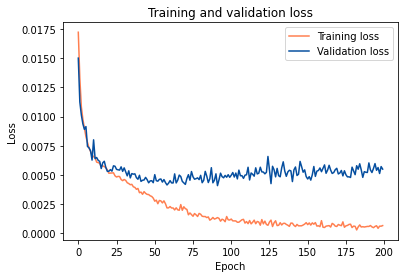

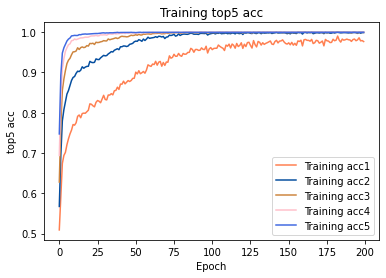

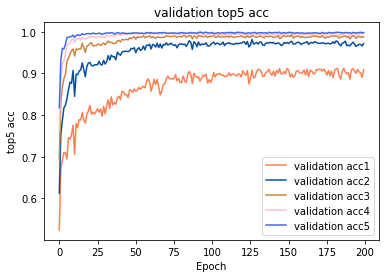

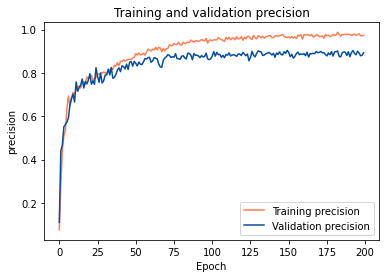

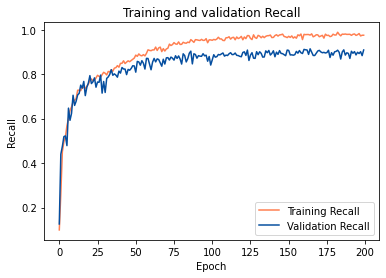

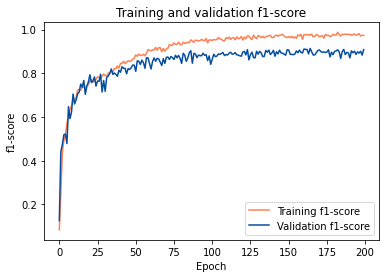

1636974377.39404


In [82]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(cnn, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### flod1(train) 

1636974609.421984
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0178 	 valid Loss: 0.0141
train acc1: 0.4940 	 valid acc1: 0.5914
train acc2: 0.5650 	 valid acc2: 0.6586
train acc3: 0.6270 	 valid acc3: 0.7564
train acc4: 0.6858 	 valid acc4: 0.8250
train acc5: 0.7339 	 valid acc5: 0.8539
train precision: 0.1370 	 valid precision: 0.1924
train recall: 0.1032 	 valid recall: 0.2191
train f1-score: 0.0874 	 valid f1-score: 0.1563
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0129 	 valid Loss: 0.0117
train acc1: 0.6019 	 valid acc1: 0.6536
train acc2: 0.7280 	 valid acc2: 0.7893
train acc3: 0.8114 	 valid acc3: 0.8636
train acc4: 0.8617 	 valid acc4: 0.9200
train acc5: 0.9030 	 valid acc5: 0.9468
train precision: 0.3185 	 valid precision: 0.3613
train recall: 0.3065 	 valid recall: 0.3907
train f1-score: 0.2975 	 valid f1-score: 0.3554
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0107 	 valid Loss: 0.0101
train acc1: 0.6626 	 valid acc1: 0.6732
train acc2: 0.7856 	 valid acc2: 0.8132
train acc3: 0.8674 	 valid acc3: 0.8925
train acc4: 0.9173 	 valid acc4: 0.9393
train acc5: 0.9535 	 valid acc5: 0.9643
train precision: 0.4347 	 valid precision: 0.4435
train recall: 0.4391 	 valid recall: 0.4301
train f1-score: 0.4319 	 valid f1-score: 0.4065
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0097 	 valid Loss: 0.0092
train acc1: 0.6911 	 valid acc1: 0.7168
train acc2: 0.8195 	 valid acc2: 0.8243
train acc3: 0.8927 	 valid acc3: 0.8911
train acc4: 0.9436 	 valid acc4: 0.9450
train acc5: 0.9633 	 valid acc5: 0.9621
train precision: 0.5100 	 valid precision: 0.5433
train recall: 0.5012 	 valid recall: 0.5304
train f1-score: 0.5008 	 valid f1-score: 0.5298
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0092 	 valid Loss: 0.0094
train acc1: 0.7014 	 valid acc1: 0.7075
train acc2: 0.8287 	 valid acc2: 0.8089
train acc3: 0.9001 	 valid acc3: 0.8918
train acc4: 0.9496 	 valid acc4: 0.9400
train acc5: 0.9694 	 valid acc5: 0.9621
train precision: 0.5760 	 valid precision: 0.5479
train recall: 0.5331 	 valid recall: 0.5165
train f1-score: 0.5287 	 valid f1-score: 0.5126
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0084 	 valid Loss: 0.0085
train acc1: 0.7160 	 valid acc1: 0.7279
train acc2: 0.8440 	 valid acc2: 0.8468
train acc3: 0.9152 	 valid acc3: 0.9164
train acc4: 0.9577 	 valid acc4: 0.9632
train acc5: 0.9770 	 valid acc5: 0.9829
train precision: 0.6302 	 valid precision: 0.5625
train recall: 0.5572 	 valid recall: 0.6008
train f1-score: 0.5577 	 valid f1-score: 0.5749
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0078 	 valid Loss: 0.0091
train acc1: 0.7374 	 valid acc1: 0.7050
train acc2: 0.8598 	 valid acc2: 0.8321
train acc3: 0.9295 	 valid acc3: 0.9182
train acc4: 0.9677 	 valid acc4: 0.9511
train acc5: 0.9825 	 valid acc5: 0.9718
train precision: 0.6573 	 valid precision: 0.5870
train recall: 0.6144 	 valid recall: 0.5994
train f1-score: 0.6148 	 valid f1-score: 0.5588
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0074 	 valid Loss: 0.0075
train acc1: 0.7471 	 valid acc1: 0.7486
train acc2: 0.8670 	 valid acc2: 0.8661
train acc3: 0.9340 	 valid acc3: 0.9361
train acc4: 0.9706 	 valid acc4: 0.9704
train acc5: 0.9879 	 valid acc5: 0.9825
train precision: 0.6633 	 valid precision: 0.6567
train recall: 0.6334 	 valid recall: 0.6376
train f1-score: 0.6314 	 valid f1-score: 0.6243
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0072 	 valid Loss: 0.0069
train acc1: 0.7506 	 valid acc1: 0.7718
train acc2: 0.8726 	 valid acc2: 0.8693
train acc3: 0.9408 	 valid acc3: 0.9421
train acc4: 0.9752 	 valid acc4: 0.9771
train acc5: 0.9888 	 valid acc5: 0.9879
train precision: 0.6907 	 valid precision: 0.6509
train recall: 0.6428 	 valid recall: 0.6874
train f1-score: 0.6416 	 valid f1-score: 0.6639
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0067 	 valid Loss: 0.0069
train acc1: 0.7671 	 valid acc1: 0.7686
train acc2: 0.8873 	 valid acc2: 0.8782
train acc3: 0.9504 	 valid acc3: 0.9468
train acc4: 0.9815 	 valid acc4: 0.9786
train acc5: 0.9917 	 valid acc5: 0.9936
train precision: 0.6881 	 valid precision: 0.7081
train recall: 0.6764 	 valid recall: 0.6777
train f1-score: 0.6695 	 valid f1-score: 0.6556
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0064 	 valid Loss: 0.0071
train acc1: 0.7748 	 valid acc1: 0.7714
train acc2: 0.8939 	 valid acc2: 0.8793
train acc3: 0.9533 	 valid acc3: 0.9482
train acc4: 0.9829 	 valid acc4: 0.9786
train acc5: 0.9937 	 valid acc5: 0.9939
train precision: 0.7095 	 valid precision: 0.6942
train recall: 0.6905 	 valid recall: 0.6917
train f1-score: 0.6880 	 valid f1-score: 0.6816
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0064 	 valid Loss: 0.0064
train acc1: 0.7758 	 valid acc1: 0.7793
train acc2: 0.8963 	 valid acc2: 0.8914
train acc3: 0.9573 	 valid acc3: 0.9536
train acc4: 0.9839 	 valid acc4: 0.9850
train acc5: 0.9924 	 valid acc5: 0.9911
train precision: 0.7099 	 valid precision: 0.7214
train recall: 0.7003 	 valid recall: 0.7143
train f1-score: 0.6968 	 valid f1-score: 0.7090
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0061 	 valid Loss: 0.0064
train acc1: 0.7902 	 valid acc1: 0.7846
train acc2: 0.9092 	 valid acc2: 0.8993
train acc3: 0.9608 	 valid acc3: 0.9511
train acc4: 0.9857 	 valid acc4: 0.9807
train acc5: 0.9945 	 valid acc5: 0.9914
train precision: 0.7355 	 valid precision: 0.7160
train recall: 0.7215 	 valid recall: 0.7458
train f1-score: 0.7179 	 valid f1-score: 0.7207
-------第 14 轮训练开始-------
train Loss: 0.0060 	 valid Loss: 0.0071
train acc1: 0.7955 	 valid acc1: 0.7721
train acc2: 0.9046 	 valid acc2: 0.8754
train acc3: 0.9615 	 valid acc3: 0.9325
train acc4: 0.9856 	 valid acc4: 0.9721
train acc5: 0.9939 	 valid acc5: 0.9879
train precision: 0.7734 	 valid precision: 0.7185
train recall: 0.7411 	 valid recall: 0.6782
train f1-score: 0.7337 	 valid f1-score: 0.6625
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0060 	 valid Loss: 0.0063
train acc1: 0.7925 	 valid acc1: 0.7771
train acc2: 0.9068 	 valid acc2: 0.8996
train acc3: 0.9607 	 valid acc3: 0.9568
train acc4: 0.9868 	 valid acc4: 0.9854
train acc5: 0.9954 	 valid acc5: 0.9925
train precision: 0.7746 	 valid precision: 0.7185
train recall: 0.7290 	 valid recall: 0.7448
train f1-score: 0.7278 	 valid f1-score: 0.7214
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0058 	 valid Loss: 0.0059
train acc1: 0.7989 	 valid acc1: 0.7968
train acc2: 0.9137 	 valid acc2: 0.9107
train acc3: 0.9679 	 valid acc3: 0.9636
train acc4: 0.9899 	 valid acc4: 0.9864
train acc5: 0.9964 	 valid acc5: 0.9936
train precision: 0.7461 	 valid precision: 0.7367
train recall: 0.7474 	 valid recall: 0.7183
train f1-score: 0.7399 	 valid f1-score: 0.7193
-------第 17 轮训练开始-------
train Loss: 0.0057 	 valid Loss: 0.0065
train acc1: 0.7982 	 valid acc1: 0.7825
train acc2: 0.9145 	 valid acc2: 0.9043
train acc3: 0.9674 	 valid acc3: 0.9600
train acc4: 0.9889 	 valid acc4: 0.9846
train acc5: 0.9968 	 valid acc5: 0.9921
train precision: 0.7528 	 valid precision: 0.7371
train recall: 0.7378 	 valid recall: 0.7601
train f1-score: 0.7345 	 valid f1-score: 0.7346
-------第 18 轮训练开始-------
train Loss: 0.0055 	 valid Loss: 0.0059
train acc1: 0.8039 	 valid acc1: 0.8007
train acc2: 0.9201 	 valid acc2: 0.9171
train acc3: 0.9702 	 valid acc3: 0.9607
train acc4: 0.9907 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0060
train acc1: 0.8067 	 valid acc1: 0.7914
train acc2: 0.9196 	 valid acc2: 0.9114
train acc3: 0.9671 	 valid acc3: 0.9561
train acc4: 0.9893 	 valid acc4: 0.9864
train acc5: 0.9970 	 valid acc5: 0.9946
train precision: 0.7696 	 valid precision: 0.7392
train recall: 0.7551 	 valid recall: 0.7323
train f1-score: 0.7504 	 valid f1-score: 0.7223
-------第 20 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0054 	 valid Loss: 0.0059
train acc1: 0.8120 	 valid acc1: 0.8057
train acc2: 0.9225 	 valid acc2: 0.9075
train acc3: 0.9702 	 valid acc3: 0.9625
train acc4: 0.9899 	 valid acc4: 0.9886
train acc5: 0.9964 	 valid acc5: 0.9936
train precision: 0.7705 	 valid precision: 0.7656
train recall: 0.7618 	 valid recall: 0.7346
train f1-score: 0.7556 	 valid f1-score: 0.7391
-------第 21 轮训练开始-------
train Loss: 0.0052 	 valid Loss: 0.0061
train acc1: 0.8176 	 valid acc1: 0.7946
train acc2: 0.9252 	 valid acc2: 0.9111
train acc3: 0.9744 	 valid acc3: 0.9625
train acc4: 0.9924 	 valid acc4: 0.9879
train acc5: 0.9983 	 valid acc5: 0.9961
train precision: 0.7820 	 valid precision: 0.7600
train recall: 0.7753 	 valid recall: 0.7430
train f1-score: 0.7688 	 valid f1-score: 0.7336
-------第 22 轮训练开始-------
train Loss: 0.0051 	 valid Loss: 0.0055
train acc1: 0.8246 	 valid acc1: 0.8100
train acc2: 0.9276 	 valid acc2: 0.9207
train acc3: 0.9744 	 valid acc3: 0.9718
train acc4: 0.9923 	 valid

train Loss: 0.0036 	 valid Loss: 0.0051
train acc1: 0.8719 	 valid acc1: 0.8243
train acc2: 0.9631 	 valid acc2: 0.9421
train acc3: 0.9883 	 valid acc3: 0.9754
train acc4: 0.9980 	 valid acc4: 0.9932
train acc5: 0.9987 	 valid acc5: 0.9968
train precision: 0.8572 	 valid precision: 0.7831
train recall: 0.8505 	 valid recall: 0.7922
train f1-score: 0.8488 	 valid f1-score: 0.7685
-------第 42 轮训练开始-------
train Loss: 0.0033 	 valid Loss: 0.0043
train acc1: 0.8749 	 valid acc1: 0.8600
train acc2: 0.9692 	 valid acc2: 0.9561
train acc3: 0.9918 	 valid acc3: 0.9843
train acc4: 0.9987 	 valid acc4: 0.9936
train acc5: 0.9996 	 valid acc5: 0.9971
train precision: 0.8578 	 valid precision: 0.8170
train recall: 0.8533 	 valid recall: 0.8441
train f1-score: 0.8514 	 valid f1-score: 0.8247
-------第 43 轮训练开始-------
train Loss: 0.0033 	 valid Loss: 0.0046
train acc1: 0.8805 	 valid acc1: 0.8511
train acc2: 0.9669 	 valid acc2: 0.9532
train acc3: 0.9905 	 valid acc3: 0.9825
train acc4: 0.9983 	 valid

train Loss: 0.0020 	 valid Loss: 0.0043
train acc1: 0.9242 	 valid acc1: 0.8836
train acc2: 0.9901 	 valid acc2: 0.9654
train acc3: 0.9987 	 valid acc3: 0.9864
train acc4: 0.9998 	 valid acc4: 0.9961
train acc5: 1.0000 	 valid acc5: 0.9982
train precision: 0.9167 	 valid precision: 0.8547
train recall: 0.9148 	 valid recall: 0.8723
train f1-score: 0.9150 	 valid f1-score: 0.8605
-------第 63 轮训练开始-------
train Loss: 0.0021 	 valid Loss: 0.0042
train acc1: 0.9224 	 valid acc1: 0.8911
train acc2: 0.9894 	 valid acc2: 0.9711
train acc3: 0.9976 	 valid acc3: 0.9871
train acc4: 0.9996 	 valid acc4: 0.9954
train acc5: 0.9998 	 valid acc5: 0.9979
train precision: 0.9136 	 valid precision: 0.8684
train recall: 0.9160 	 valid recall: 0.8805
train f1-score: 0.9142 	 valid f1-score: 0.8726
-------第 64 轮训练开始-------
train Loss: 0.0021 	 valid Loss: 0.0047
train acc1: 0.9219 	 valid acc1: 0.8654
train acc2: 0.9883 	 valid acc2: 0.9593
train acc3: 0.9967 	 valid acc3: 0.9843
train acc4: 0.9994 	 valid

train Loss: 0.0013 	 valid Loss: 0.0046
train acc1: 0.9515 	 valid acc1: 0.9054
train acc2: 0.9969 	 valid acc2: 0.9725
train acc3: 0.9993 	 valid acc3: 0.9857
train acc4: 0.9998 	 valid acc4: 0.9936
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9441 	 valid precision: 0.8894
train recall: 0.9477 	 valid recall: 0.8945
train f1-score: 0.9456 	 valid f1-score: 0.8898
-------第 84 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0050
train acc1: 0.9445 	 valid acc1: 0.8796
train acc2: 0.9940 	 valid acc2: 0.9611
train acc3: 0.9982 	 valid acc3: 0.9789
train acc4: 0.9996 	 valid acc4: 0.9907
train acc5: 1.0000 	 valid acc5: 0.9943
train precision: 0.9356 	 valid precision: 0.8584
train recall: 0.9387 	 valid recall: 0.8649
train f1-score: 0.9369 	 valid f1-score: 0.8582
-------第 85 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0049
train acc1: 0.9473 	 valid acc1: 0.8868
train acc2: 0.9935 	 valid acc2: 0.9636
train acc3: 0.9989 	 valid acc3: 0.9836
train acc4: 0.9996 	 valid

train Loss: 0.0010 	 valid Loss: 0.0048
train acc1: 0.9621 	 valid acc1: 0.8911
train acc2: 0.9977 	 valid acc2: 0.9707
train acc3: 0.9996 	 valid acc3: 0.9861
train acc4: 1.0000 	 valid acc4: 0.9925
train acc5: 1.0000 	 valid acc5: 0.9946
train precision: 0.9561 	 valid precision: 0.8644
train recall: 0.9599 	 valid recall: 0.8929
train f1-score: 0.9578 	 valid f1-score: 0.8765
-------第 105 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0054
train acc1: 0.9574 	 valid acc1: 0.8871
train acc2: 0.9967 	 valid acc2: 0.9650
train acc3: 0.9998 	 valid acc3: 0.9889
train acc4: 1.0000 	 valid acc4: 0.9936
train acc5: 1.0000 	 valid acc5: 0.9946
train precision: 0.9486 	 valid precision: 0.8644
train recall: 0.9524 	 valid recall: 0.8735
train f1-score: 0.9504 	 valid f1-score: 0.8642
-------第 106 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0048
train acc1: 0.9646 	 valid acc1: 0.9014
train acc2: 0.9973 	 valid acc2: 0.9761
train acc3: 0.9998 	 valid acc3: 0.9857
train acc4: 1.0000 	 val

train Loss: 0.0008 	 valid Loss: 0.0053
train acc1: 0.9724 	 valid acc1: 0.8936
train acc2: 0.9993 	 valid acc2: 0.9736
train acc3: 1.0000 	 valid acc3: 0.9846
train acc4: 1.0000 	 valid acc4: 0.9921
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9675 	 valid precision: 0.8727
train recall: 0.9690 	 valid recall: 0.8895
train f1-score: 0.9681 	 valid f1-score: 0.8774
-------第 126 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0059
train acc1: 0.9762 	 valid acc1: 0.8886
train acc2: 0.9988 	 valid acc2: 0.9732
train acc3: 1.0000 	 valid acc3: 0.9864
train acc4: 1.0000 	 valid acc4: 0.9939
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9724 	 valid precision: 0.8595
train recall: 0.9755 	 valid recall: 0.8839
train f1-score: 0.9739 	 valid f1-score: 0.8680
-------第 127 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0057
train acc1: 0.9692 	 valid acc1: 0.8775
train acc2: 0.9976 	 valid acc2: 0.9707
train acc3: 0.9994 	 valid acc3: 0.9868
train acc4: 0.9999 	 val

train Loss: 0.0007 	 valid Loss: 0.0052
train acc1: 0.9749 	 valid acc1: 0.9046
train acc2: 0.9986 	 valid acc2: 0.9739
train acc3: 0.9996 	 valid acc3: 0.9868
train acc4: 0.9999 	 valid acc4: 0.9943
train acc5: 0.9999 	 valid acc5: 0.9979
train precision: 0.9708 	 valid precision: 0.8746
train recall: 0.9728 	 valid recall: 0.8931
train f1-score: 0.9718 	 valid f1-score: 0.8819
-------第 147 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0058
train acc1: 0.9808 	 valid acc1: 0.8968
train acc2: 0.9988 	 valid acc2: 0.9714
train acc3: 0.9999 	 valid acc3: 0.9854
train acc4: 1.0000 	 valid acc4: 0.9929
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9755 	 valid precision: 0.8770
train recall: 0.9801 	 valid recall: 0.8829
train f1-score: 0.9778 	 valid f1-score: 0.8775
-------第 148 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0056
train acc1: 0.9806 	 valid acc1: 0.9036
train acc2: 0.9992 	 valid acc2: 0.9711
train acc3: 0.9998 	 valid acc3: 0.9846
train acc4: 1.0000 	 val

train Loss: 0.0006 	 valid Loss: 0.0051
train acc1: 0.9780 	 valid acc1: 0.9146
train acc2: 0.9988 	 valid acc2: 0.9754
train acc3: 0.9998 	 valid acc3: 0.9871
train acc4: 0.9999 	 valid acc4: 0.9929
train acc5: 0.9999 	 valid acc5: 0.9971
train precision: 0.9735 	 valid precision: 0.8883
train recall: 0.9774 	 valid recall: 0.9166
train f1-score: 0.9754 	 valid f1-score: 0.9003
-------第 168 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0056
train acc1: 0.9810 	 valid acc1: 0.9032
train acc2: 0.9992 	 valid acc2: 0.9736
train acc3: 0.9999 	 valid acc3: 0.9875
train acc4: 0.9999 	 valid acc4: 0.9925
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9768 	 valid precision: 0.8798
train recall: 0.9804 	 valid recall: 0.8887
train f1-score: 0.9785 	 valid f1-score: 0.8825
-------第 169 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0054
train acc1: 0.9762 	 valid acc1: 0.9046
train acc2: 0.9986 	 valid acc2: 0.9689
train acc3: 0.9998 	 valid acc3: 0.9839
train acc4: 0.9998 	 val

train Loss: 0.0006 	 valid Loss: 0.0055
train acc1: 0.9806 	 valid acc1: 0.9089
train acc2: 0.9988 	 valid acc2: 0.9721
train acc3: 0.9995 	 valid acc3: 0.9864
train acc4: 1.0000 	 valid acc4: 0.9925
train acc5: 1.0000 	 valid acc5: 0.9961
train precision: 0.9742 	 valid precision: 0.8849
train recall: 0.9777 	 valid recall: 0.8981
train f1-score: 0.9759 	 valid f1-score: 0.8888
-------第 189 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0059
train acc1: 0.9770 	 valid acc1: 0.8968
train acc2: 0.9983 	 valid acc2: 0.9675
train acc3: 0.9995 	 valid acc3: 0.9868
train acc4: 0.9999 	 valid acc4: 0.9936
train acc5: 1.0000 	 valid acc5: 0.9961
train precision: 0.9731 	 valid precision: 0.8780
train recall: 0.9714 	 valid recall: 0.8938
train f1-score: 0.9722 	 valid f1-score: 0.8840
-------第 190 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0053
train acc1: 0.9801 	 valid acc1: 0.9125
train acc2: 0.9992 	 valid acc2: 0.9743
train acc3: 0.9999 	 valid acc3: 0.9879
train acc4: 1.0000 	 val

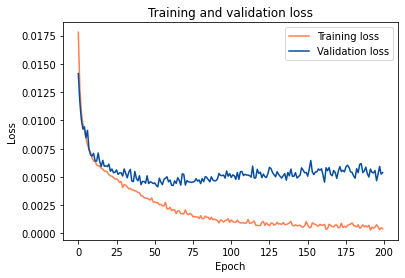

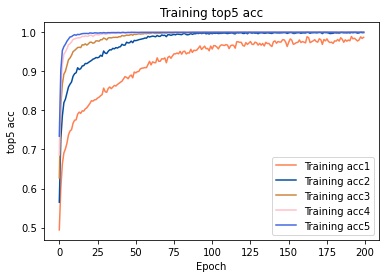

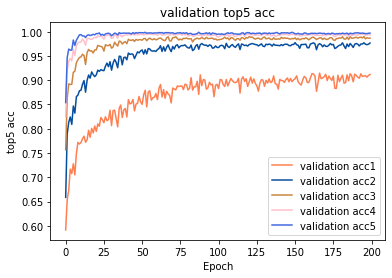

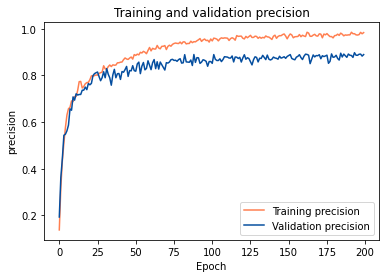

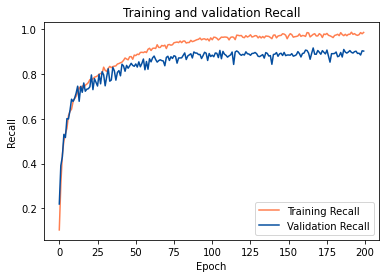

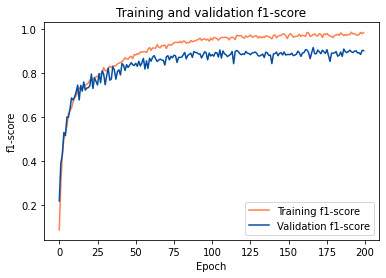

1636976341.7454588


In [101]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(cnn, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

###  flod2(train)

1636976575.877975
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0171 	 valid Loss: 0.0147
train acc1: 0.5139 	 valid acc1: 0.5429
train acc2: 0.5865 	 valid acc2: 0.6243
train acc3: 0.6532 	 valid acc3: 0.7079
train acc4: 0.7143 	 valid acc4: 0.7800
train acc5: 0.7754 	 valid acc5: 0.8482
train precision: 0.1567 	 valid precision: 0.1527
train recall: 0.1020 	 valid recall: 0.1431
train f1-score: 0.0810 	 valid f1-score: 0.1017
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0125 	 valid Loss: 0.0113
train acc1: 0.6273 	 valid acc1: 0.6639
train acc2: 0.7326 	 valid acc2: 0.7829
train acc3: 0.8065 	 valid acc3: 0.8529
train acc4: 0.8602 	 valid acc4: 0.8914
train acc5: 0.9048 	 valid acc5: 0.9311
train precision: 0.3515 	 valid precision: 0.4326
train recall: 0.3429 	 valid recall: 0.4467
train f1-score: 0.3359 	 valid f1-score: 0.4105
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0104 	 valid Loss: 0.0099
train acc1: 0.6845 	 valid acc1: 0.6900
train acc2: 0.7925 	 valid acc2: 0.8121
train acc3: 0.8635 	 valid acc3: 0.8886
train acc4: 0.9132 	 valid acc4: 0.9250
train acc5: 0.9492 	 valid acc5: 0.9546
train precision: 0.4682 	 valid precision: 0.5279
train recall: 0.4701 	 valid recall: 0.4881
train f1-score: 0.4643 	 valid f1-score: 0.4846
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0097 	 valid Loss: 0.0092
train acc1: 0.6945 	 valid acc1: 0.7189
train acc2: 0.8215 	 valid acc2: 0.8321
train acc3: 0.8936 	 valid acc3: 0.9018
train acc4: 0.9386 	 valid acc4: 0.9414
train acc5: 0.9623 	 valid acc5: 0.9664
train precision: 0.5111 	 valid precision: 0.5470
train recall: 0.5034 	 valid recall: 0.5667
train f1-score: 0.5000 	 valid f1-score: 0.5533
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0090 	 valid Loss: 0.0093
train acc1: 0.7069 	 valid acc1: 0.7029
train acc2: 0.8292 	 valid acc2: 0.8229
train acc3: 0.9020 	 valid acc3: 0.8921
train acc4: 0.9498 	 valid acc4: 0.9389
train acc5: 0.9701 	 valid acc5: 0.9632
train precision: 0.5887 	 valid precision: 0.5346
train recall: 0.5300 	 valid recall: 0.5283
train f1-score: 0.5260 	 valid f1-score: 0.5169
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0087 	 valid Loss: 0.0085
train acc1: 0.7163 	 valid acc1: 0.7207
train acc2: 0.8349 	 valid acc2: 0.8414
train acc3: 0.9089 	 valid acc3: 0.9157
train acc4: 0.9580 	 valid acc4: 0.9543
train acc5: 0.9761 	 valid acc5: 0.9754
train precision: 0.5857 	 valid precision: 0.5518
train recall: 0.5512 	 valid recall: 0.5649
train f1-score: 0.5445 	 valid f1-score: 0.5539
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0080 	 valid Loss: 0.0080
train acc1: 0.7217 	 valid acc1: 0.7268
train acc2: 0.8460 	 valid acc2: 0.8543
train acc3: 0.9168 	 valid acc3: 0.9236
train acc4: 0.9637 	 valid acc4: 0.9618
train acc5: 0.9807 	 valid acc5: 0.9843
train precision: 0.6189 	 valid precision: 0.6652
train recall: 0.5689 	 valid recall: 0.5914
train f1-score: 0.5655 	 valid f1-score: 0.5783
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0075 	 valid Loss: 0.0078
train acc1: 0.7401 	 valid acc1: 0.7475
train acc2: 0.8652 	 valid acc2: 0.8629
train acc3: 0.9352 	 valid acc3: 0.9318
train acc4: 0.9705 	 valid acc4: 0.9657
train acc5: 0.9852 	 valid acc5: 0.9868
train precision: 0.6614 	 valid precision: 0.7131
train recall: 0.6153 	 valid recall: 0.6077
train f1-score: 0.6177 	 valid f1-score: 0.6273
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0072 	 valid Loss: 0.0068
train acc1: 0.7536 	 valid acc1: 0.7707
train acc2: 0.8701 	 valid acc2: 0.8736
train acc3: 0.9410 	 valid acc3: 0.9443
train acc4: 0.9744 	 valid acc4: 0.9739
train acc5: 0.9885 	 valid acc5: 0.9886
train precision: 0.6760 	 valid precision: 0.6887
train recall: 0.6489 	 valid recall: 0.6684
train f1-score: 0.6506 	 valid f1-score: 0.6622
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0069 	 valid Loss: 0.0068
train acc1: 0.7588 	 valid acc1: 0.7793
train acc2: 0.8756 	 valid acc2: 0.8936
train acc3: 0.9477 	 valid acc3: 0.9521
train acc4: 0.9795 	 valid acc4: 0.9729
train acc5: 0.9910 	 valid acc5: 0.9900
train precision: 0.6875 	 valid precision: 0.7593
train recall: 0.6655 	 valid recall: 0.6915
train f1-score: 0.6643 	 valid f1-score: 0.6929
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0066 	 valid Loss: 0.0066
train acc1: 0.7674 	 valid acc1: 0.7746
train acc2: 0.8838 	 valid acc2: 0.8800
train acc3: 0.9488 	 valid acc3: 0.9514
train acc4: 0.9808 	 valid acc4: 0.9782
train acc5: 0.9907 	 valid acc5: 0.9896
train precision: 0.7188 	 valid precision: 0.7386
train recall: 0.6870 	 valid recall: 0.6932
train f1-score: 0.6857 	 valid f1-score: 0.6736
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0063 	 valid Loss: 0.0065
train acc1: 0.7799 	 valid acc1: 0.7989
train acc2: 0.8926 	 valid acc2: 0.8950
train acc3: 0.9532 	 valid acc3: 0.9496
train acc4: 0.9820 	 valid acc4: 0.9761
train acc5: 0.9925 	 valid acc5: 0.9914
train precision: 0.7223 	 valid precision: 0.7510
train recall: 0.6983 	 valid recall: 0.7287
train f1-score: 0.6975 	 valid f1-score: 0.7309
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0060 	 valid Loss: 0.0064
train acc1: 0.7864 	 valid acc1: 0.7836
train acc2: 0.9033 	 valid acc2: 0.9093
train acc3: 0.9614 	 valid acc3: 0.9546
train acc4: 0.9844 	 valid acc4: 0.9811
train acc5: 0.9938 	 valid acc5: 0.9921
train precision: 0.7453 	 valid precision: 0.7540
train recall: 0.7183 	 valid recall: 0.7199
train f1-score: 0.7163 	 valid f1-score: 0.7037
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0060 	 valid Loss: 0.0060
train acc1: 0.7918 	 valid acc1: 0.8057
train acc2: 0.9049 	 valid acc2: 0.9089
train acc3: 0.9595 	 valid acc3: 0.9604
train acc4: 0.9845 	 valid acc4: 0.9843
train acc5: 0.9939 	 valid acc5: 0.9939
train precision: 0.7436 	 valid precision: 0.7614
train recall: 0.7363 	 valid recall: 0.7353
train f1-score: 0.7283 	 valid f1-score: 0.7343
-------第 15 轮训练开始-------
train Loss: 0.0057 	 valid Loss: 0.0057
train acc1: 0.8000 	 valid acc1: 0.8057
train acc2: 0.9112 	 valid acc2: 0.9143
train acc3: 0.9635 	 valid acc3: 0.9696
train acc4: 0.9870 	 valid acc4: 0.9882
train acc5: 0.9954 	 valid acc5: 0.9957
train precision: 0.7652 	 valid precision: 0.7536
train recall: 0.7438 	 valid recall: 0.7527
train f1-score: 0.7392 	 valid f1-score: 0.7423
-------第 16 轮训练开始-------
train Loss: 0.0057 	 valid Loss: 0.0064
train acc1: 0.7982 	 valid acc1: 0.7854
train acc2: 0.9114 	 valid acc2: 0.8918
train acc3: 0.9638 	 valid acc3: 0.9525
train acc4: 0.9867 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0052 	 valid Loss: 0.0062
train acc1: 0.8145 	 valid acc1: 0.7825
train acc2: 0.9205 	 valid acc2: 0.9175
train acc3: 0.9711 	 valid acc3: 0.9646
train acc4: 0.9905 	 valid acc4: 0.9886
train acc5: 0.9951 	 valid acc5: 0.9957
train precision: 0.7802 	 valid precision: 0.7152
train recall: 0.7732 	 valid recall: 0.7191
train f1-score: 0.7663 	 valid f1-score: 0.7071
-------第 20 轮训练开始-------
train Loss: 0.0053 	 valid Loss: 0.0054
train acc1: 0.8152 	 valid acc1: 0.8146
train acc2: 0.9262 	 valid acc2: 0.9321
train acc3: 0.9708 	 valid acc3: 0.9675
train acc4: 0.9904 	 valid acc4: 0.9907
train acc5: 0.9956 	 valid acc5: 0.9957
train precision: 0.7837 	 valid precision: 0.7604
train recall: 0.7715 	 valid recall: 0.7791
train f1-score: 0.7637 	 valid f1-score: 0.7568
-------第 21 轮训练开始-------
train Loss: 0.0050 	 valid Loss: 0.0057
train acc1: 0.8270 	 valid acc1: 0.8039
train acc2: 0.9301 	 valid acc2: 0.9111
train acc3: 0.9739 	 valid acc3: 0.9654
train acc4: 0.9914 	 valid

train Loss: 0.0034 	 valid Loss: 0.0049
train acc1: 0.8763 	 valid acc1: 0.8361
train acc2: 0.9669 	 valid acc2: 0.9514
train acc3: 0.9899 	 valid acc3: 0.9857
train acc4: 0.9979 	 valid acc4: 0.9946
train acc5: 0.9994 	 valid acc5: 0.9979
train precision: 0.8598 	 valid precision: 0.8086
train recall: 0.8531 	 valid recall: 0.8149
train f1-score: 0.8526 	 valid f1-score: 0.8015
-------第 41 轮训练开始-------
train Loss: 0.0036 	 valid Loss: 0.0044
train acc1: 0.8692 	 valid acc1: 0.8568
train acc2: 0.9646 	 valid acc2: 0.9529
train acc3: 0.9896 	 valid acc3: 0.9846
train acc4: 0.9975 	 valid acc4: 0.9946
train acc5: 0.9993 	 valid acc5: 0.9979
train precision: 0.8528 	 valid precision: 0.8316
train recall: 0.8483 	 valid recall: 0.8228
train f1-score: 0.8468 	 valid f1-score: 0.8213
-------第 42 轮训练开始-------
train Loss: 0.0033 	 valid Loss: 0.0045
train acc1: 0.8792 	 valid acc1: 0.8607
train acc2: 0.9699 	 valid acc2: 0.9557
train acc3: 0.9918 	 valid acc3: 0.9854
train acc4: 0.9987 	 valid

train Loss: 0.0020 	 valid Loss: 0.0045
train acc1: 0.9236 	 valid acc1: 0.8707
train acc2: 0.9887 	 valid acc2: 0.9689
train acc3: 0.9973 	 valid acc3: 0.9879
train acc4: 0.9995 	 valid acc4: 0.9939
train acc5: 0.9999 	 valid acc5: 0.9971
train precision: 0.9142 	 valid precision: 0.8495
train recall: 0.9136 	 valid recall: 0.8443
train f1-score: 0.9129 	 valid f1-score: 0.8436
-------第 62 轮训练开始-------
train Loss: 0.0020 	 valid Loss: 0.0046
train acc1: 0.9219 	 valid acc1: 0.8914
train acc2: 0.9907 	 valid acc2: 0.9689
train acc3: 0.9977 	 valid acc3: 0.9854
train acc4: 0.9999 	 valid acc4: 0.9939
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9111 	 valid precision: 0.8905
train recall: 0.9131 	 valid recall: 0.8590
train f1-score: 0.9115 	 valid f1-score: 0.8578
-------第 63 轮训练开始-------
train Loss: 0.0018 	 valid Loss: 0.0047
train acc1: 0.9311 	 valid acc1: 0.8839
train acc2: 0.9923 	 valid acc2: 0.9657
train acc3: 0.9983 	 valid acc3: 0.9893
train acc4: 1.0000 	 valid

train Loss: 0.0014 	 valid Loss: 0.0058
train acc1: 0.9524 	 valid acc1: 0.8804
train acc2: 0.9950 	 valid acc2: 0.9625
train acc3: 0.9985 	 valid acc3: 0.9850
train acc4: 0.9992 	 valid acc4: 0.9936
train acc5: 0.9994 	 valid acc5: 0.9968
train precision: 0.9420 	 valid precision: 0.8756
train recall: 0.9481 	 valid recall: 0.8459
train f1-score: 0.9448 	 valid f1-score: 0.8584
-------第 83 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0051
train acc1: 0.9485 	 valid acc1: 0.8886
train acc2: 0.9939 	 valid acc2: 0.9696
train acc3: 0.9990 	 valid acc3: 0.9857
train acc4: 0.9999 	 valid acc4: 0.9936
train acc5: 0.9999 	 valid acc5: 0.9964
train precision: 0.9397 	 valid precision: 0.8719
train recall: 0.9448 	 valid recall: 0.8700
train f1-score: 0.9421 	 valid f1-score: 0.8697
-------第 84 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0046
train acc1: 0.9539 	 valid acc1: 0.8893
train acc2: 0.9956 	 valid acc2: 0.9700
train acc3: 0.9994 	 valid acc3: 0.9864
train acc4: 0.9999 	 valid

train Loss: 0.0010 	 valid Loss: 0.0045
train acc1: 0.9613 	 valid acc1: 0.9014
train acc2: 0.9968 	 valid acc2: 0.9707
train acc3: 0.9994 	 valid acc3: 0.9843
train acc4: 0.9999 	 valid acc4: 0.9932
train acc5: 0.9999 	 valid acc5: 0.9961
train precision: 0.9543 	 valid precision: 0.8841
train recall: 0.9552 	 valid recall: 0.9033
train f1-score: 0.9547 	 valid f1-score: 0.8918
-------第 104 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0057
train acc1: 0.9673 	 valid acc1: 0.8829
train acc2: 0.9971 	 valid acc2: 0.9618
train acc3: 0.9995 	 valid acc3: 0.9846
train acc4: 1.0000 	 valid acc4: 0.9918
train acc5: 1.0000 	 valid acc5: 0.9961
train precision: 0.9590 	 valid precision: 0.8614
train recall: 0.9640 	 valid recall: 0.8732
train f1-score: 0.9614 	 valid f1-score: 0.8654
-------第 105 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0049
train acc1: 0.9589 	 valid acc1: 0.9043
train acc2: 0.9955 	 valid acc2: 0.9657
train acc3: 0.9995 	 valid acc3: 0.9839
train acc4: 1.0000 	 val

train Loss: 0.0007 	 valid Loss: 0.0055
train acc1: 0.9762 	 valid acc1: 0.9014
train acc2: 0.9980 	 valid acc2: 0.9689
train acc3: 0.9995 	 valid acc3: 0.9839
train acc4: 0.9999 	 valid acc4: 0.9939
train acc5: 1.0000 	 valid acc5: 0.9975
train precision: 0.9703 	 valid precision: 0.8880
train recall: 0.9726 	 valid recall: 0.8960
train f1-score: 0.9714 	 valid f1-score: 0.8905
-------第 125 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0057
train acc1: 0.9774 	 valid acc1: 0.9061
train acc2: 0.9987 	 valid acc2: 0.9714
train acc3: 0.9998 	 valid acc3: 0.9871
train acc4: 1.0000 	 valid acc4: 0.9939
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9714 	 valid precision: 0.8896
train recall: 0.9757 	 valid recall: 0.9064
train f1-score: 0.9735 	 valid f1-score: 0.8964
-------第 126 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0051
train acc1: 0.9700 	 valid acc1: 0.8979
train acc2: 0.9977 	 valid acc2: 0.9700
train acc3: 0.9995 	 valid acc3: 0.9854
train acc4: 0.9999 	 val

train Loss: 0.0007 	 valid Loss: 0.0051
train acc1: 0.9770 	 valid acc1: 0.8986
train acc2: 0.9985 	 valid acc2: 0.9700
train acc3: 0.9996 	 valid acc3: 0.9868
train acc4: 1.0000 	 valid acc4: 0.9943
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9710 	 valid precision: 0.8890
train recall: 0.9724 	 valid recall: 0.8858
train f1-score: 0.9716 	 valid f1-score: 0.8851
-------第 146 轮训练开始-------
train Loss: 0.0005 	 valid Loss: 0.0065
train acc1: 0.9825 	 valid acc1: 0.9014
train acc2: 0.9993 	 valid acc2: 0.9689
train acc3: 1.0000 	 valid acc3: 0.9864
train acc4: 1.0000 	 valid acc4: 0.9939
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9781 	 valid precision: 0.8846
train recall: 0.9802 	 valid recall: 0.8903
train f1-score: 0.9791 	 valid f1-score: 0.8852
-------第 147 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0055
train acc1: 0.9745 	 valid acc1: 0.8921
train acc2: 0.9974 	 valid acc2: 0.9679
train acc3: 0.9988 	 valid acc3: 0.9839
train acc4: 0.9993 	 val

train Loss: 0.0007 	 valid Loss: 0.0052
train acc1: 0.9764 	 valid acc1: 0.8993
train acc2: 0.9982 	 valid acc2: 0.9671
train acc3: 0.9999 	 valid acc3: 0.9861
train acc4: 1.0000 	 valid acc4: 0.9925
train acc5: 1.0000 	 valid acc5: 0.9971
train precision: 0.9695 	 valid precision: 0.8836
train recall: 0.9712 	 valid recall: 0.8773
train f1-score: 0.9703 	 valid f1-score: 0.8789
-------第 167 轮训练开始-------
train Loss: 0.0005 	 valid Loss: 0.0055
train acc1: 0.9819 	 valid acc1: 0.9104
train acc2: 0.9988 	 valid acc2: 0.9754
train acc3: 0.9994 	 valid acc3: 0.9861
train acc4: 0.9999 	 valid acc4: 0.9939
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9776 	 valid precision: 0.9018
train recall: 0.9799 	 valid recall: 0.8924
train f1-score: 0.9787 	 valid f1-score: 0.8966
-------第 168 轮训练开始-------
train Loss: 0.0004 	 valid Loss: 0.0064
train acc1: 0.9879 	 valid acc1: 0.9011
train acc2: 0.9995 	 valid acc2: 0.9654
train acc3: 0.9998 	 valid acc3: 0.9814
train acc4: 1.0000 	 val

train Loss: 0.0011 	 valid Loss: 0.0054
train acc1: 0.9664 	 valid acc1: 0.9018
train acc2: 0.9957 	 valid acc2: 0.9721
train acc3: 0.9994 	 valid acc3: 0.9864
train acc4: 0.9999 	 valid acc4: 0.9936
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9587 	 valid precision: 0.8855
train recall: 0.9577 	 valid recall: 0.8985
train f1-score: 0.9582 	 valid f1-score: 0.8908
-------第 188 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0052
train acc1: 0.9768 	 valid acc1: 0.9075
train acc2: 0.9986 	 valid acc2: 0.9671
train acc3: 0.9998 	 valid acc3: 0.9807
train acc4: 1.0000 	 valid acc4: 0.9900
train acc5: 1.0000 	 valid acc5: 0.9946
train precision: 0.9727 	 valid precision: 0.9049
train recall: 0.9774 	 valid recall: 0.8818
train f1-score: 0.9750 	 valid f1-score: 0.8907
-------第 189 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0054
train acc1: 0.9823 	 valid acc1: 0.9096
train acc2: 0.9987 	 valid acc2: 0.9693
train acc3: 0.9998 	 valid acc3: 0.9857
train acc4: 0.9998 	 val

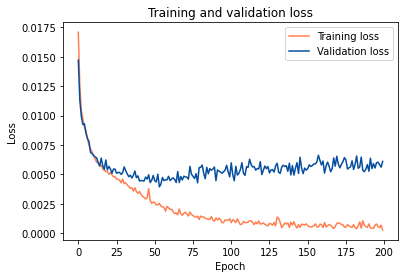

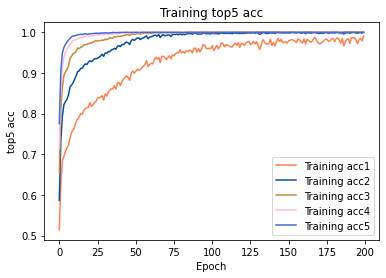

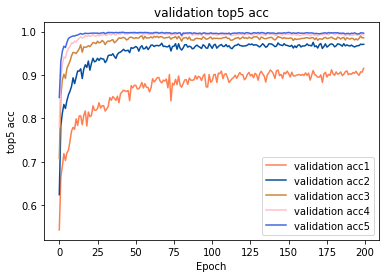

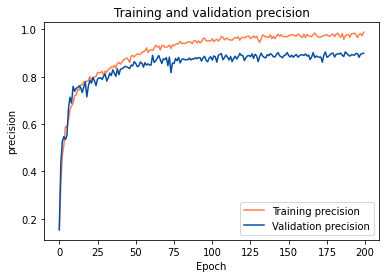

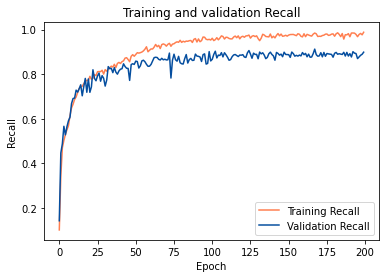

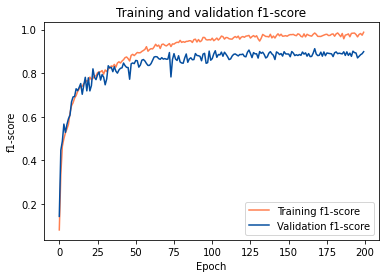

1636978323.014115


In [120]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(cnn, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### flod3(train) 

1636978459.116881
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0177 	 valid Loss: 0.0149
train acc1: 0.5187 	 valid acc1: 0.5329
train acc2: 0.5796 	 valid acc2: 0.6150
train acc3: 0.6396 	 valid acc3: 0.6921
train acc4: 0.6967 	 valid acc4: 0.7525
train acc5: 0.7540 	 valid acc5: 0.8243
train precision: 0.1340 	 valid precision: 0.1106
train recall: 0.1005 	 valid recall: 0.1269
train f1-score: 0.0824 	 valid f1-score: 0.0678
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0133 	 valid Loss: 0.0117
train acc1: 0.5929 	 valid acc1: 0.6421
train acc2: 0.7051 	 valid acc2: 0.7500
train acc3: 0.7921 	 valid acc3: 0.8386
train acc4: 0.8498 	 valid acc4: 0.8771
train acc5: 0.8924 	 valid acc5: 0.9136
train precision: 0.2917 	 valid precision: 0.3663
train recall: 0.2680 	 valid recall: 0.3695
train f1-score: 0.2657 	 valid f1-score: 0.3423
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0107 	 valid Loss: 0.0104
train acc1: 0.6727 	 valid acc1: 0.6714
train acc2: 0.7838 	 valid acc2: 0.7921
train acc3: 0.8627 	 valid acc3: 0.8646
train acc4: 0.9155 	 valid acc4: 0.9200
train acc5: 0.9480 	 valid acc5: 0.9511
train precision: 0.4419 	 valid precision: 0.4374
train recall: 0.4462 	 valid recall: 0.4415
train f1-score: 0.4387 	 valid f1-score: 0.4309
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0102 	 valid Loss: 0.0099
train acc1: 0.6787 	 valid acc1: 0.6796
train acc2: 0.8033 	 valid acc2: 0.8057
train acc3: 0.8798 	 valid acc3: 0.8936
train acc4: 0.9267 	 valid acc4: 0.9368
train acc5: 0.9561 	 valid acc5: 0.9621
train precision: 0.4570 	 valid precision: 0.4788
train recall: 0.4601 	 valid recall: 0.4783
train f1-score: 0.4536 	 valid f1-score: 0.4659
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0093 	 valid Loss: 0.0091
train acc1: 0.6963 	 valid acc1: 0.7057
train acc2: 0.8214 	 valid acc2: 0.8214
train acc3: 0.8951 	 valid acc3: 0.8996
train acc4: 0.9426 	 valid acc4: 0.9443
train acc5: 0.9662 	 valid acc5: 0.9725
train precision: 0.5119 	 valid precision: 0.5133
train recall: 0.5080 	 valid recall: 0.5066
train f1-score: 0.5060 	 valid f1-score: 0.5011
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0088 	 valid Loss: 0.0085
train acc1: 0.7112 	 valid acc1: 0.7021
train acc2: 0.8371 	 valid acc2: 0.8346
train acc3: 0.9114 	 valid acc3: 0.9229
train acc4: 0.9593 	 valid acc4: 0.9646
train acc5: 0.9751 	 valid acc5: 0.9807
train precision: 0.5370 	 valid precision: 0.5311
train recall: 0.5332 	 valid recall: 0.5421
train f1-score: 0.5263 	 valid f1-score: 0.5296
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0081 	 valid Loss: 0.0079
train acc1: 0.7319 	 valid acc1: 0.7236
train acc2: 0.8545 	 valid acc2: 0.8668
train acc3: 0.9265 	 valid acc3: 0.9361
train acc4: 0.9670 	 valid acc4: 0.9664
train acc5: 0.9818 	 valid acc5: 0.9868
train precision: 0.6451 	 valid precision: 0.5910
train recall: 0.5856 	 valid recall: 0.5695
train f1-score: 0.5905 	 valid f1-score: 0.5634
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0074 	 valid Loss: 0.0078
train acc1: 0.7493 	 valid acc1: 0.7400
train acc2: 0.8679 	 valid acc2: 0.8618
train acc3: 0.9413 	 valid acc3: 0.9321
train acc4: 0.9715 	 valid acc4: 0.9668
train acc5: 0.9870 	 valid acc5: 0.9875
train precision: 0.6620 	 valid precision: 0.6979
train recall: 0.6177 	 valid recall: 0.6233
train f1-score: 0.6186 	 valid f1-score: 0.6308
-------第 9 轮训练开始-------
train Loss: 0.0069 	 valid Loss: 0.0072
train acc1: 0.7645 	 valid acc1: 0.7514
train acc2: 0.8806 	 valid acc2: 0.8725
train acc3: 0.9479 	 valid acc3: 0.9375
train acc4: 0.9785 	 valid acc4: 0.9779
train acc5: 0.9898 	 valid acc5: 0.9900
train precision: 0.6912 	 valid precision: 0.7342
train recall: 0.6497 	 valid recall: 0.6247
train f1-score: 0.6568 	 valid f1-score: 0.6412
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0068 	 valid Loss: 0.0076
train acc1: 0.7648 	 valid acc1: 0.7375
train acc2: 0.8839 	 valid acc2: 0.8696
train acc3: 0.9506 	 valid acc3: 0.9296
train acc4: 0.9792 	 valid acc4: 0.9700
train acc5: 0.9912 	 valid acc5: 0.9829
train precision: 0.7087 	 valid precision: 0.7251
train recall: 0.6667 	 valid recall: 0.6587
train f1-score: 0.6731 	 valid f1-score: 0.6359
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0065 	 valid Loss: 0.0068
train acc1: 0.7806 	 valid acc1: 0.7668
train acc2: 0.8940 	 valid acc2: 0.8786
train acc3: 0.9544 	 valid acc3: 0.9411
train acc4: 0.9801 	 valid acc4: 0.9793
train acc5: 0.9907 	 valid acc5: 0.9921
train precision: 0.7241 	 valid precision: 0.7447
train recall: 0.6907 	 valid recall: 0.6711
train f1-score: 0.6942 	 valid f1-score: 0.6832
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0062 	 valid Loss: 0.0071
train acc1: 0.7867 	 valid acc1: 0.7650
train acc2: 0.8979 	 valid acc2: 0.8700
train acc3: 0.9589 	 valid acc3: 0.9389
train acc4: 0.9840 	 valid acc4: 0.9750
train acc5: 0.9940 	 valid acc5: 0.9929
train precision: 0.7314 	 valid precision: 0.7206
train recall: 0.7072 	 valid recall: 0.6951
train f1-score: 0.7093 	 valid f1-score: 0.6793
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0062 	 valid Loss: 0.0068
train acc1: 0.7886 	 valid acc1: 0.7629
train acc2: 0.9015 	 valid acc2: 0.8789
train acc3: 0.9583 	 valid acc3: 0.9525
train acc4: 0.9830 	 valid acc4: 0.9804
train acc5: 0.9931 	 valid acc5: 0.9921
train precision: 0.7387 	 valid precision: 0.7045
train recall: 0.7026 	 valid recall: 0.6582
train f1-score: 0.7051 	 valid f1-score: 0.6654
-------第 14 轮训练开始-------
train Loss: 0.0057 	 valid Loss: 0.0066
train acc1: 0.7993 	 valid acc1: 0.7679
train acc2: 0.9112 	 valid acc2: 0.8846
train acc3: 0.9664 	 valid acc3: 0.9575
train acc4: 0.9868 	 valid acc4: 0.9807
train acc5: 0.9948 	 valid acc5: 0.9936
train precision: 0.7745 	 valid precision: 0.7230
train recall: 0.7251 	 valid recall: 0.7306
train f1-score: 0.7259 	 valid f1-score: 0.6936
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0057 	 valid Loss: 0.0066
train acc1: 0.8020 	 valid acc1: 0.7764
train acc2: 0.9162 	 valid acc2: 0.8982
train acc3: 0.9664 	 valid acc3: 0.9586
train acc4: 0.9874 	 valid acc4: 0.9821
train acc5: 0.9960 	 valid acc5: 0.9936
train precision: 0.7684 	 valid precision: 0.7514
train recall: 0.7323 	 valid recall: 0.7333
train f1-score: 0.7326 	 valid f1-score: 0.7155
-------第 16 轮训练开始-------
train Loss: 0.0058 	 valid Loss: 0.0062
train acc1: 0.7967 	 valid acc1: 0.7911
train acc2: 0.9089 	 valid acc2: 0.9057
train acc3: 0.9648 	 valid acc3: 0.9589
train acc4: 0.9879 	 valid acc4: 0.9811
train acc5: 0.9957 	 valid acc5: 0.9936
train precision: 0.7485 	 valid precision: 0.7563
train recall: 0.7246 	 valid recall: 0.7594
train f1-score: 0.7227 	 valid f1-score: 0.7398
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0054 	 valid Loss: 0.0060
train acc1: 0.8074 	 valid acc1: 0.7979
train acc2: 0.9183 	 valid acc2: 0.9111
train acc3: 0.9685 	 valid acc3: 0.9704
train acc4: 0.9863 	 valid acc4: 0.9850
train acc5: 0.9958 	 valid acc5: 0.9954
train precision: 0.7649 	 valid precision: 0.7660
train recall: 0.7467 	 valid recall: 0.7307
train f1-score: 0.7441 	 valid f1-score: 0.7240
-------第 18 轮训练开始-------
train Loss: 0.0053 	 valid Loss: 0.0057
train acc1: 0.8168 	 valid acc1: 0.8061
train acc2: 0.9232 	 valid acc2: 0.9161
train acc3: 0.9704 	 valid acc3: 0.9607
train acc4: 0.9893 	 valid acc4: 0.9857
train acc5: 0.9964 	 valid acc5: 0.9968
train precision: 0.7958 	 valid precision: 0.7672
train recall: 0.7610 	 valid recall: 0.7667
train f1-score: 0.7570 	 valid f1-score: 0.7604
-------第 19 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0052 	 valid Loss: 0.0060
train acc1: 0.8182 	 valid acc1: 0.7939
train acc2: 0.9236 	 valid acc2: 0.9096
train acc3: 0.9719 	 valid acc3: 0.9625
train acc4: 0.9896 	 valid acc4: 0.9832
train acc5: 0.9967 	 valid acc5: 0.9961
train precision: 0.7799 	 valid precision: 0.7667
train recall: 0.7635 	 valid recall: 0.7388
train f1-score: 0.7586 	 valid f1-score: 0.7297
-------第 20 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0051 	 valid Loss: 0.0061
train acc1: 0.8201 	 valid acc1: 0.7875
train acc2: 0.9224 	 valid acc2: 0.9168
train acc3: 0.9724 	 valid acc3: 0.9621
train acc4: 0.9901 	 valid acc4: 0.9861
train acc5: 0.9969 	 valid acc5: 0.9968
train precision: 0.7930 	 valid precision: 0.7526
train recall: 0.7703 	 valid recall: 0.7296
train f1-score: 0.7656 	 valid f1-score: 0.7204
-------第 21 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0052 	 valid Loss: 0.0063
train acc1: 0.8156 	 valid acc1: 0.7889
train acc2: 0.9250 	 valid acc2: 0.9082
train acc3: 0.9712 	 valid acc3: 0.9604
train acc4: 0.9896 	 valid acc4: 0.9811
train acc5: 0.9970 	 valid acc5: 0.9904
train precision: 0.7770 	 valid precision: 0.7648
train recall: 0.7545 	 valid recall: 0.7122
train f1-score: 0.7529 	 valid f1-score: 0.7250
-------第 22 轮训练开始-------
train Loss: 0.0049 	 valid Loss: 0.0061
train acc1: 0.8262 	 valid acc1: 0.7846
train acc2: 0.9345 	 valid acc2: 0.9139
train acc3: 0.9771 	 valid acc3: 0.9611
train acc4: 0.9918 	 valid acc4: 0.9836
train acc5: 0.9983 	 valid acc5: 0.9968
train precision: 0.7973 	 valid precision: 0.7291
train recall: 0.7741 	 valid recall: 0.7926
train f1-score: 0.7670 	 valid f1-score: 0.7479
-------第 23 轮训练开始-------
train Loss: 0.0048 	 valid Loss: 0.0056
train acc1: 0.8258 	 valid acc1: 0.8057
train acc2: 0.9365 	 valid acc2: 0.9179
train acc3: 0.9750 	 valid acc3: 0.9686
train acc4: 0.9907 	 valid

train Loss: 0.0029 	 valid Loss: 0.0050
train acc1: 0.8931 	 valid acc1: 0.8468
train acc2: 0.9758 	 valid acc2: 0.9504
train acc3: 0.9937 	 valid acc3: 0.9829
train acc4: 0.9988 	 valid acc4: 0.9950
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.8822 	 valid precision: 0.8500
train recall: 0.8698 	 valid recall: 0.8164
train f1-score: 0.8723 	 valid f1-score: 0.8259
-------第 43 轮训练开始-------
train Loss: 0.0034 	 valid Loss: 0.0048
train acc1: 0.8793 	 valid acc1: 0.8421
train acc2: 0.9671 	 valid acc2: 0.9507
train acc3: 0.9894 	 valid acc3: 0.9843
train acc4: 0.9980 	 valid acc4: 0.9950
train acc5: 0.9993 	 valid acc5: 0.9986
train precision: 0.8667 	 valid precision: 0.8480
train recall: 0.8506 	 valid recall: 0.8163
train f1-score: 0.8542 	 valid f1-score: 0.8178
-------第 44 轮训练开始-------
train Loss: 0.0029 	 valid Loss: 0.0046
train acc1: 0.8930 	 valid acc1: 0.8511
train acc2: 0.9762 	 valid acc2: 0.9468
train acc3: 0.9930 	 valid acc3: 0.9839
train acc4: 0.9981 	 valid

train Loss: 0.0022 	 valid Loss: 0.0043
train acc1: 0.9174 	 valid acc1: 0.8832
train acc2: 0.9874 	 valid acc2: 0.9636
train acc3: 0.9973 	 valid acc3: 0.9871
train acc4: 0.9995 	 valid acc4: 0.9943
train acc5: 0.9998 	 valid acc5: 0.9968
train precision: 0.8987 	 valid precision: 0.8787
train recall: 0.9028 	 valid recall: 0.8711
train f1-score: 0.9001 	 valid f1-score: 0.8738
-------第 64 轮训练开始-------
train Loss: 0.0017 	 valid Loss: 0.0051
train acc1: 0.9380 	 valid acc1: 0.8761
train acc2: 0.9937 	 valid acc2: 0.9629
train acc3: 0.9985 	 valid acc3: 0.9875
train acc4: 0.9998 	 valid acc4: 0.9946
train acc5: 1.0000 	 valid acc5: 0.9971
train precision: 0.9269 	 valid precision: 0.8770
train recall: 0.9306 	 valid recall: 0.8461
train f1-score: 0.9279 	 valid f1-score: 0.8568
-------第 65 轮训练开始-------
train Loss: 0.0017 	 valid Loss: 0.0050
train acc1: 0.9382 	 valid acc1: 0.8764
train acc2: 0.9933 	 valid acc2: 0.9582
train acc3: 0.9981 	 valid acc3: 0.9850
train acc4: 0.9995 	 valid

train Loss: 0.0015 	 valid Loss: 0.0058
train acc1: 0.9437 	 valid acc1: 0.8629
train acc2: 0.9939 	 valid acc2: 0.9543
train acc3: 0.9982 	 valid acc3: 0.9807
train acc4: 0.9998 	 valid acc4: 0.9918
train acc5: 1.0000 	 valid acc5: 0.9954
train precision: 0.9304 	 valid precision: 0.8527
train recall: 0.9367 	 valid recall: 0.8385
train f1-score: 0.9333 	 valid f1-score: 0.8327
-------第 85 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0052
train acc1: 0.9531 	 valid acc1: 0.8914
train acc2: 0.9961 	 valid acc2: 0.9664
train acc3: 0.9994 	 valid acc3: 0.9864
train acc4: 0.9998 	 valid acc4: 0.9929
train acc5: 0.9998 	 valid acc5: 0.9957
train precision: 0.9436 	 valid precision: 0.8891
train recall: 0.9479 	 valid recall: 0.8725
train f1-score: 0.9455 	 valid f1-score: 0.8773
-------第 86 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0051
train acc1: 0.9624 	 valid acc1: 0.8943
train acc2: 0.9974 	 valid acc2: 0.9704
train acc3: 0.9998 	 valid acc3: 0.9843
train acc4: 1.0000 	 valid

train Loss: 0.0011 	 valid Loss: 0.0052
train acc1: 0.9625 	 valid acc1: 0.9004
train acc2: 0.9973 	 valid acc2: 0.9739
train acc3: 0.9994 	 valid acc3: 0.9889
train acc4: 0.9998 	 valid acc4: 0.9939
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9536 	 valid precision: 0.8939
train recall: 0.9627 	 valid recall: 0.8930
train f1-score: 0.9580 	 valid f1-score: 0.8927
-------第 106 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0055
train acc1: 0.9670 	 valid acc1: 0.8854
train acc2: 0.9983 	 valid acc2: 0.9721
train acc3: 0.9998 	 valid acc3: 0.9854
train acc4: 0.9999 	 valid acc4: 0.9939
train acc5: 0.9999 	 valid acc5: 0.9964
train precision: 0.9583 	 valid precision: 0.8888
train recall: 0.9661 	 valid recall: 0.8663
train f1-score: 0.9621 	 valid f1-score: 0.8758
-------第 107 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0049
train acc1: 0.9548 	 valid acc1: 0.8968
train acc2: 0.9955 	 valid acc2: 0.9736
train acc3: 0.9989 	 valid acc3: 0.9864
train acc4: 0.9992 	 val

train Loss: 0.0010 	 valid Loss: 0.0052
train acc1: 0.9644 	 valid acc1: 0.9011
train acc2: 0.9974 	 valid acc2: 0.9732
train acc3: 0.9994 	 valid acc3: 0.9882
train acc4: 1.0000 	 valid acc4: 0.9932
train acc5: 1.0000 	 valid acc5: 0.9961
train precision: 0.9552 	 valid precision: 0.8956
train recall: 0.9603 	 valid recall: 0.8908
train f1-score: 0.9576 	 valid f1-score: 0.8922
-------第 127 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0052
train acc1: 0.9642 	 valid acc1: 0.8921
train acc2: 0.9962 	 valid acc2: 0.9721
train acc3: 0.9996 	 valid acc3: 0.9875
train acc4: 0.9999 	 valid acc4: 0.9939
train acc5: 1.0000 	 valid acc5: 0.9961
train precision: 0.9534 	 valid precision: 0.8852
train recall: 0.9594 	 valid recall: 0.8864
train f1-score: 0.9563 	 valid f1-score: 0.8839
-------第 128 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0056
train acc1: 0.9735 	 valid acc1: 0.8954
train acc2: 0.9985 	 valid acc2: 0.9714
train acc3: 0.9999 	 valid acc3: 0.9886
train acc4: 1.0000 	 val

train Loss: 0.0008 	 valid Loss: 0.0052
train acc1: 0.9674 	 valid acc1: 0.8961
train acc2: 0.9977 	 valid acc2: 0.9693
train acc3: 0.9996 	 valid acc3: 0.9843
train acc4: 0.9999 	 valid acc4: 0.9907
train acc5: 1.0000 	 valid acc5: 0.9943
train precision: 0.9600 	 valid precision: 0.8984
train recall: 0.9654 	 valid recall: 0.8845
train f1-score: 0.9626 	 valid f1-score: 0.8896
-------第 148 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0057
train acc1: 0.9721 	 valid acc1: 0.9004
train acc2: 0.9985 	 valid acc2: 0.9750
train acc3: 0.9998 	 valid acc3: 0.9857
train acc4: 1.0000 	 valid acc4: 0.9918
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9626 	 valid precision: 0.8995
train recall: 0.9673 	 valid recall: 0.8843
train f1-score: 0.9648 	 valid f1-score: 0.8899
-------第 149 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0061
train acc1: 0.9781 	 valid acc1: 0.8921
train acc2: 0.9990 	 valid acc2: 0.9700
train acc3: 1.0000 	 valid acc3: 0.9843
train acc4: 1.0000 	 val

train Loss: 0.0006 	 valid Loss: 0.0060
train acc1: 0.9795 	 valid acc1: 0.8986
train acc2: 0.9986 	 valid acc2: 0.9732
train acc3: 0.9998 	 valid acc3: 0.9861
train acc4: 0.9999 	 valid acc4: 0.9929
train acc5: 0.9999 	 valid acc5: 0.9964
train precision: 0.9739 	 valid precision: 0.9048
train recall: 0.9743 	 valid recall: 0.8767
train f1-score: 0.9740 	 valid f1-score: 0.8873
-------第 169 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0053
train acc1: 0.9719 	 valid acc1: 0.8975
train acc2: 0.9983 	 valid acc2: 0.9736
train acc3: 0.9996 	 valid acc3: 0.9875
train acc4: 0.9999 	 valid acc4: 0.9932
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9636 	 valid precision: 0.8889
train recall: 0.9671 	 valid recall: 0.8798
train f1-score: 0.9652 	 valid f1-score: 0.8786
-------第 170 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0049
train acc1: 0.9742 	 valid acc1: 0.9014
train acc2: 0.9980 	 valid acc2: 0.9732
train acc3: 0.9994 	 valid acc3: 0.9886
train acc4: 0.9999 	 val

train Loss: 0.0007 	 valid Loss: 0.0057
train acc1: 0.9756 	 valid acc1: 0.8921
train acc2: 0.9976 	 valid acc2: 0.9629
train acc3: 0.9995 	 valid acc3: 0.9864
train acc4: 0.9998 	 valid acc4: 0.9921
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9682 	 valid precision: 0.8820
train recall: 0.9696 	 valid recall: 0.8783
train f1-score: 0.9688 	 valid f1-score: 0.8767
-------第 190 轮训练开始-------
train Loss: 0.0005 	 valid Loss: 0.0064
train acc1: 0.9840 	 valid acc1: 0.9075
train acc2: 0.9990 	 valid acc2: 0.9714
train acc3: 1.0000 	 valid acc3: 0.9846
train acc4: 1.0000 	 valid acc4: 0.9907
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9782 	 valid precision: 0.9149
train recall: 0.9830 	 valid recall: 0.8911
train f1-score: 0.9806 	 valid f1-score: 0.9010
-------第 191 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0050
train acc1: 0.9749 	 valid acc1: 0.8936
train acc2: 0.9981 	 valid acc2: 0.9732
train acc3: 0.9993 	 valid acc3: 0.9864
train acc4: 0.9995 	 val

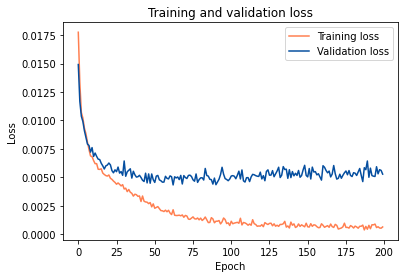

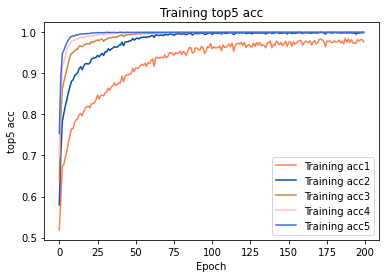

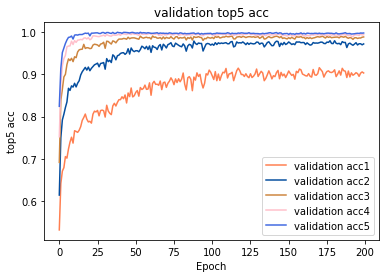

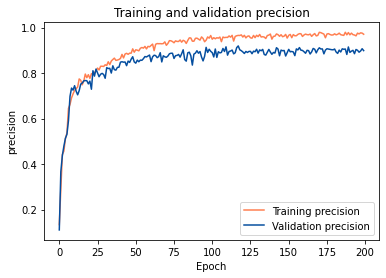

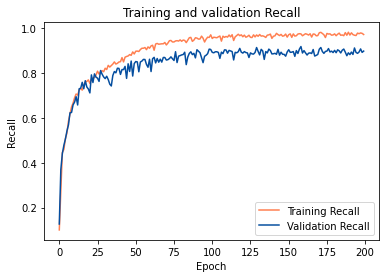

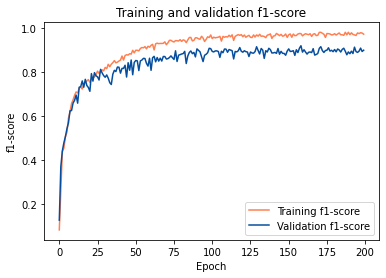

1636980203.350249


In [138]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(cnn, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### flod4(train)

1636980345.157282
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0179 	 valid Loss: 0.0139
train acc1: 0.5168 	 valid acc1: 0.5732
train acc2: 0.5906 	 valid acc2: 0.6775
train acc3: 0.6456 	 valid acc3: 0.7779
train acc4: 0.7056 	 valid acc4: 0.8296
train acc5: 0.7569 	 valid acc5: 0.8807
train precision: 0.1408 	 valid precision: 0.1999
train recall: 0.1162 	 valid recall: 0.2464
train f1-score: 0.1007 	 valid f1-score: 0.1834
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0115 	 valid Loss: 0.0109
train acc1: 0.6508 	 valid acc1: 0.6554
train acc2: 0.7702 	 valid acc2: 0.7914
train acc3: 0.8429 	 valid acc3: 0.8650
train acc4: 0.8937 	 valid acc4: 0.9200
train acc5: 0.9251 	 valid acc5: 0.9579
train precision: 0.4210 	 valid precision: 0.4686
train recall: 0.4009 	 valid recall: 0.4433
train f1-score: 0.3981 	 valid f1-score: 0.4200
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0102 	 valid Loss: 0.0096
train acc1: 0.6813 	 valid acc1: 0.6954
train acc2: 0.8162 	 valid acc2: 0.8239
train acc3: 0.8830 	 valid acc3: 0.8929
train acc4: 0.9325 	 valid acc4: 0.9411
train acc5: 0.9594 	 valid acc5: 0.9700
train precision: 0.4790 	 valid precision: 0.5322
train recall: 0.4730 	 valid recall: 0.5252
train f1-score: 0.4706 	 valid f1-score: 0.5251
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0093 	 valid Loss: 0.0096
train acc1: 0.7005 	 valid acc1: 0.6864
train acc2: 0.8329 	 valid acc2: 0.8268
train acc3: 0.9080 	 valid acc3: 0.9029
train acc4: 0.9530 	 valid acc4: 0.9475
train acc5: 0.9740 	 valid acc5: 0.9750
train precision: 0.5115 	 valid precision: 0.5033
train recall: 0.5198 	 valid recall: 0.4856
train f1-score: 0.5123 	 valid f1-score: 0.4840
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0087 	 valid Loss: 0.0091
train acc1: 0.7154 	 valid acc1: 0.6971
train acc2: 0.8424 	 valid acc2: 0.8357
train acc3: 0.9189 	 valid acc3: 0.9082
train acc4: 0.9625 	 valid acc4: 0.9539
train acc5: 0.9796 	 valid acc5: 0.9757
train precision: 0.5629 	 valid precision: 0.5758
train recall: 0.5381 	 valid recall: 0.5182
train f1-score: 0.5334 	 valid f1-score: 0.5278
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0082 	 valid Loss: 0.0082
train acc1: 0.7280 	 valid acc1: 0.7196
train acc2: 0.8512 	 valid acc2: 0.8454
train acc3: 0.9258 	 valid acc3: 0.9311
train acc4: 0.9639 	 valid acc4: 0.9689
train acc5: 0.9820 	 valid acc5: 0.9800
train precision: 0.6184 	 valid precision: 0.6703
train recall: 0.5761 	 valid recall: 0.5679
train f1-score: 0.5785 	 valid f1-score: 0.5766
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0078 	 valid Loss: 0.0082
train acc1: 0.7382 	 valid acc1: 0.7261
train acc2: 0.8632 	 valid acc2: 0.8539
train acc3: 0.9331 	 valid acc3: 0.9236
train acc4: 0.9696 	 valid acc4: 0.9618
train acc5: 0.9862 	 valid acc5: 0.9818
train precision: 0.6331 	 valid precision: 0.6831
train recall: 0.6026 	 valid recall: 0.6261
train f1-score: 0.6038 	 valid f1-score: 0.6159
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0072 	 valid Loss: 0.0074
train acc1: 0.7589 	 valid acc1: 0.7525
train acc2: 0.8760 	 valid acc2: 0.8657
train acc3: 0.9414 	 valid acc3: 0.9375
train acc4: 0.9727 	 valid acc4: 0.9693
train acc5: 0.9873 	 valid acc5: 0.9861
train precision: 0.6847 	 valid precision: 0.7166
train recall: 0.6435 	 valid recall: 0.6582
train f1-score: 0.6414 	 valid f1-score: 0.6485
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0069 	 valid Loss: 0.0072
train acc1: 0.7657 	 valid acc1: 0.7514
train acc2: 0.8837 	 valid acc2: 0.8732
train acc3: 0.9490 	 valid acc3: 0.9475
train acc4: 0.9790 	 valid acc4: 0.9761
train acc5: 0.9904 	 valid acc5: 0.9893
train precision: 0.7035 	 valid precision: 0.7564
train recall: 0.6629 	 valid recall: 0.6217
train f1-score: 0.6596 	 valid f1-score: 0.6270
-------第 10 轮训练开始-------
train Loss: 0.0066 	 valid Loss: 0.0076
train acc1: 0.7779 	 valid acc1: 0.7461
train acc2: 0.8873 	 valid acc2: 0.8593
train acc3: 0.9551 	 valid acc3: 0.9407
train acc4: 0.9813 	 valid acc4: 0.9732
train acc5: 0.9906 	 valid acc5: 0.9879
train precision: 0.7206 	 valid precision: 0.7335
train recall: 0.6795 	 valid recall: 0.6479
train f1-score: 0.6768 	 valid f1-score: 0.6559
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0067 	 valid Loss: 0.0071
train acc1: 0.7693 	 valid acc1: 0.7568
train acc2: 0.8874 	 valid acc2: 0.8736
train acc3: 0.9515 	 valid acc3: 0.9439
train acc4: 0.9792 	 valid acc4: 0.9764
train acc5: 0.9906 	 valid acc5: 0.9886
train precision: 0.7184 	 valid precision: 0.7227
train recall: 0.6760 	 valid recall: 0.6650
train f1-score: 0.6756 	 valid f1-score: 0.6646
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0063 	 valid Loss: 0.0070
train acc1: 0.7863 	 valid acc1: 0.7636
train acc2: 0.8974 	 valid acc2: 0.8807
train acc3: 0.9592 	 valid acc3: 0.9461
train acc4: 0.9837 	 valid acc4: 0.9775
train acc5: 0.9930 	 valid acc5: 0.9904
train precision: 0.7319 	 valid precision: 0.7501
train recall: 0.7049 	 valid recall: 0.6445
train f1-score: 0.7019 	 valid f1-score: 0.6704
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0061 	 valid Loss: 0.0070
train acc1: 0.7901 	 valid acc1: 0.7618
train acc2: 0.9039 	 valid acc2: 0.8904
train acc3: 0.9590 	 valid acc3: 0.9500
train acc4: 0.9835 	 valid acc4: 0.9746
train acc5: 0.9925 	 valid acc5: 0.9889
train precision: 0.7386 	 valid precision: 0.7127
train recall: 0.7112 	 valid recall: 0.6601
train f1-score: 0.7112 	 valid f1-score: 0.6625
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0063 	 valid Loss: 0.0069
train acc1: 0.7771 	 valid acc1: 0.7764
train acc2: 0.8980 	 valid acc2: 0.8900
train acc3: 0.9570 	 valid acc3: 0.9464
train acc4: 0.9839 	 valid acc4: 0.9821
train acc5: 0.9935 	 valid acc5: 0.9932
train precision: 0.7193 	 valid precision: 0.7754
train recall: 0.6904 	 valid recall: 0.7003
train f1-score: 0.6872 	 valid f1-score: 0.7103
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0061 	 valid Loss: 0.0068
train acc1: 0.7917 	 valid acc1: 0.7718
train acc2: 0.9030 	 valid acc2: 0.9050
train acc3: 0.9561 	 valid acc3: 0.9536
train acc4: 0.9840 	 valid acc4: 0.9814
train acc5: 0.9933 	 valid acc5: 0.9929
train precision: 0.7937 	 valid precision: 0.7496
train recall: 0.7120 	 valid recall: 0.6787
train f1-score: 0.7121 	 valid f1-score: 0.6899
-------第 16 轮训练开始-------
train Loss: 0.0058 	 valid Loss: 0.0063
train acc1: 0.7962 	 valid acc1: 0.7882
train acc2: 0.9129 	 valid acc2: 0.9032
train acc3: 0.9652 	 valid acc3: 0.9571
train acc4: 0.9865 	 valid acc4: 0.9868
train acc5: 0.9946 	 valid acc5: 0.9932
train precision: 0.7507 	 valid precision: 0.8129
train recall: 0.7297 	 valid recall: 0.7090
train f1-score: 0.7264 	 valid f1-score: 0.7201
-------第 17 轮训练开始-------
train Loss: 0.0057 	 valid Loss: 0.0064
train acc1: 0.8046 	 valid acc1: 0.7836
train acc2: 0.9127 	 valid acc2: 0.8964
train acc3: 0.9656 	 valid acc3: 0.9589
train acc4: 0.9869 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0056 	 valid Loss: 0.0066
train acc1: 0.8063 	 valid acc1: 0.7771
train acc2: 0.9146 	 valid acc2: 0.8921
train acc3: 0.9660 	 valid acc3: 0.9543
train acc4: 0.9888 	 valid acc4: 0.9814
train acc5: 0.9961 	 valid acc5: 0.9896
train precision: 0.7590 	 valid precision: 0.7426
train recall: 0.7446 	 valid recall: 0.7225
train f1-score: 0.7404 	 valid f1-score: 0.7091
-------第 19 轮训练开始-------
train Loss: 0.0055 	 valid Loss: 0.0061
train acc1: 0.8087 	 valid acc1: 0.7993
train acc2: 0.9140 	 valid acc2: 0.9075
train acc3: 0.9635 	 valid acc3: 0.9525
train acc4: 0.9874 	 valid acc4: 0.9836
train acc5: 0.9961 	 valid acc5: 0.9921
train precision: 0.7748 	 valid precision: 0.8137
train recall: 0.7494 	 valid recall: 0.7613
train f1-score: 0.7449 	 valid f1-score: 0.7582
-------第 20 轮训练开始-------
train Loss: 0.0056 	 valid Loss: 0.0061
train acc1: 0.8063 	 valid acc1: 0.7850
train acc2: 0.9138 	 valid acc2: 0.9132
train acc3: 0.9651 	 valid acc3: 0.9600
train acc4: 0.9877 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0046 	 valid Loss: 0.0055
train acc1: 0.8370 	 valid acc1: 0.8136
train acc2: 0.9388 	 valid acc2: 0.9186
train acc3: 0.9768 	 valid acc3: 0.9636
train acc4: 0.9931 	 valid acc4: 0.9879
train acc5: 0.9981 	 valid acc5: 0.9964
train precision: 0.8143 	 valid precision: 0.7762
train recall: 0.7946 	 valid recall: 0.7574
train f1-score: 0.7928 	 valid f1-score: 0.7590
-------第 29 轮训练开始-------
train Loss: 0.0044 	 valid Loss: 0.0058
train acc1: 0.8408 	 valid acc1: 0.8018
train acc2: 0.9446 	 valid acc2: 0.9100
train acc3: 0.9788 	 valid acc3: 0.9675
train acc4: 0.9946 	 valid acc4: 0.9886
train acc5: 0.9987 	 valid acc5: 0.9964
train precision: 0.8165 	 valid precision: 0.7638
train recall: 0.7999 	 valid recall: 0.7406
train f1-score: 0.7963 	 valid f1-score: 0.7376
-------第 30 轮训练开始-------
train Loss: 0.0044 	 valid Loss: 0.0051
train acc1: 0.8440 	 valid acc1: 0.8300
train acc2: 0.9432 	 valid acc2: 0.9293
train acc3: 0.9808 	 valid acc3: 0.9754
train acc4: 0.9951 	 valid

train Loss: 0.0030 	 valid Loss: 0.0049
train acc1: 0.8918 	 valid acc1: 0.8521
train acc2: 0.9746 	 valid acc2: 0.9561
train acc3: 0.9930 	 valid acc3: 0.9850
train acc4: 0.9983 	 valid acc4: 0.9975
train acc5: 0.9998 	 valid acc5: 0.9982
train precision: 0.8814 	 valid precision: 0.8386
train recall: 0.8724 	 valid recall: 0.8045
train f1-score: 0.8741 	 valid f1-score: 0.8153
-------第 50 轮训练开始-------
train Loss: 0.0027 	 valid Loss: 0.0046
train acc1: 0.9023 	 valid acc1: 0.8704
train acc2: 0.9787 	 valid acc2: 0.9557
train acc3: 0.9948 	 valid acc3: 0.9836
train acc4: 0.9989 	 valid acc4: 0.9954
train acc5: 0.9995 	 valid acc5: 0.9975
train precision: 0.8929 	 valid precision: 0.8624
train recall: 0.8858 	 valid recall: 0.8359
train f1-score: 0.8876 	 valid f1-score: 0.8448
-------第 51 轮训练开始-------
train Loss: 0.0024 	 valid Loss: 0.0048
train acc1: 0.9104 	 valid acc1: 0.8579
train acc2: 0.9826 	 valid acc2: 0.9543
train acc3: 0.9943 	 valid acc3: 0.9839
train acc4: 0.9987 	 valid

train Loss: 0.0016 	 valid Loss: 0.0052
train acc1: 0.9407 	 valid acc1: 0.8750
train acc2: 0.9920 	 valid acc2: 0.9625
train acc3: 0.9985 	 valid acc3: 0.9854
train acc4: 0.9998 	 valid acc4: 0.9968
train acc5: 1.0000 	 valid acc5: 0.9989
train precision: 0.9324 	 valid precision: 0.8718
train recall: 0.9359 	 valid recall: 0.8488
train f1-score: 0.9337 	 valid f1-score: 0.8552
-------第 71 轮训练开始-------
train Loss: 0.0018 	 valid Loss: 0.0041
train acc1: 0.9331 	 valid acc1: 0.8868
train acc2: 0.9915 	 valid acc2: 0.9686
train acc3: 0.9980 	 valid acc3: 0.9871
train acc4: 0.9996 	 valid acc4: 0.9964
train acc5: 0.9999 	 valid acc5: 0.9986
train precision: 0.9222 	 valid precision: 0.8695
train recall: 0.9242 	 valid recall: 0.8912
train f1-score: 0.9228 	 valid f1-score: 0.8779
-------第 72 轮训练开始-------
train Loss: 0.0018 	 valid Loss: 0.0049
train acc1: 0.9302 	 valid acc1: 0.8682
train acc2: 0.9919 	 valid acc2: 0.9643
train acc3: 0.9975 	 valid acc3: 0.9850
train acc4: 0.9995 	 valid

train Loss: 0.0011 	 valid Loss: 0.0048
train acc1: 0.9575 	 valid acc1: 0.8921
train acc2: 0.9971 	 valid acc2: 0.9704
train acc3: 0.9999 	 valid acc3: 0.9886
train acc4: 0.9999 	 valid acc4: 0.9971
train acc5: 1.0000 	 valid acc5: 0.9989
train precision: 0.9461 	 valid precision: 0.8783
train recall: 0.9530 	 valid recall: 0.9001
train f1-score: 0.9493 	 valid f1-score: 0.8875
-------第 92 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0047
train acc1: 0.9556 	 valid acc1: 0.8821
train acc2: 0.9948 	 valid acc2: 0.9714
train acc3: 0.9987 	 valid acc3: 0.9911
train acc4: 0.9996 	 valid acc4: 0.9968
train acc5: 0.9999 	 valid acc5: 0.9986
train precision: 0.9480 	 valid precision: 0.8642
train recall: 0.9541 	 valid recall: 0.8836
train f1-score: 0.9509 	 valid f1-score: 0.8710
-------第 93 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0049
train acc1: 0.9611 	 valid acc1: 0.8975
train acc2: 0.9967 	 valid acc2: 0.9714
train acc3: 0.9993 	 valid acc3: 0.9886
train acc4: 0.9998 	 valid

train Loss: 0.0012 	 valid Loss: 0.0043
train acc1: 0.9585 	 valid acc1: 0.9021
train acc2: 0.9958 	 valid acc2: 0.9754
train acc3: 0.9990 	 valid acc3: 0.9936
train acc4: 0.9998 	 valid acc4: 0.9975
train acc5: 0.9999 	 valid acc5: 0.9982
train precision: 0.9475 	 valid precision: 0.8874
train recall: 0.9545 	 valid recall: 0.8966
train f1-score: 0.9508 	 valid f1-score: 0.8910
-------第 113 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0046
train acc1: 0.9617 	 valid acc1: 0.9061
train acc2: 0.9965 	 valid acc2: 0.9754
train acc3: 0.9994 	 valid acc3: 0.9914
train acc4: 0.9996 	 valid acc4: 0.9968
train acc5: 0.9998 	 valid acc5: 0.9989
train precision: 0.9517 	 valid precision: 0.8972
train recall: 0.9566 	 valid recall: 0.8948
train f1-score: 0.9540 	 valid f1-score: 0.8946
-------第 114 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0056
train acc1: 0.9698 	 valid acc1: 0.8889
train acc2: 0.9976 	 valid acc2: 0.9693
train acc3: 0.9995 	 valid acc3: 0.9850
train acc4: 0.9999 	 val

train Loss: 0.0007 	 valid Loss: 0.0053
train acc1: 0.9761 	 valid acc1: 0.9018
train acc2: 0.9980 	 valid acc2: 0.9736
train acc3: 1.0000 	 valid acc3: 0.9889
train acc4: 1.0000 	 valid acc4: 0.9961
train acc5: 1.0000 	 valid acc5: 0.9979
train precision: 0.9694 	 valid precision: 0.9017
train recall: 0.9740 	 valid recall: 0.8824
train f1-score: 0.9717 	 valid f1-score: 0.8895
-------第 134 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0050
train acc1: 0.9726 	 valid acc1: 0.9011
train acc2: 0.9981 	 valid acc2: 0.9757
train acc3: 0.9996 	 valid acc3: 0.9886
train acc4: 0.9999 	 valid acc4: 0.9968
train acc5: 1.0000 	 valid acc5: 0.9979
train precision: 0.9676 	 valid precision: 0.8836
train recall: 0.9709 	 valid recall: 0.8884
train f1-score: 0.9692 	 valid f1-score: 0.8836
-------第 135 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0043
train acc1: 0.9683 	 valid acc1: 0.9068
train acc2: 0.9968 	 valid acc2: 0.9736
train acc3: 0.9994 	 valid acc3: 0.9871
train acc4: 1.0000 	 val

train Loss: 0.0008 	 valid Loss: 0.0054
train acc1: 0.9730 	 valid acc1: 0.8929
train acc2: 0.9977 	 valid acc2: 0.9679
train acc3: 0.9998 	 valid acc3: 0.9864
train acc4: 0.9999 	 valid acc4: 0.9964
train acc5: 0.9999 	 valid acc5: 0.9989
train precision: 0.9674 	 valid precision: 0.8835
train recall: 0.9702 	 valid recall: 0.8806
train f1-score: 0.9687 	 valid f1-score: 0.8801
-------第 155 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0052
train acc1: 0.9799 	 valid acc1: 0.9096
train acc2: 0.9992 	 valid acc2: 0.9746
train acc3: 0.9998 	 valid acc3: 0.9896
train acc4: 0.9999 	 valid acc4: 0.9961
train acc5: 0.9999 	 valid acc5: 0.9982
train precision: 0.9737 	 valid precision: 0.9076
train recall: 0.9788 	 valid recall: 0.8949
train f1-score: 0.9762 	 valid f1-score: 0.8998
-------第 156 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0047
train acc1: 0.9750 	 valid acc1: 0.9043
train acc2: 0.9982 	 valid acc2: 0.9721
train acc3: 0.9998 	 valid acc3: 0.9882
train acc4: 0.9999 	 val

train Loss: 0.0009 	 valid Loss: 0.0049
train acc1: 0.9706 	 valid acc1: 0.8968
train acc2: 0.9975 	 valid acc2: 0.9668
train acc3: 0.9994 	 valid acc3: 0.9879
train acc4: 0.9995 	 valid acc4: 0.9961
train acc5: 0.9998 	 valid acc5: 0.9986
train precision: 0.9610 	 valid precision: 0.8828
train recall: 0.9646 	 valid recall: 0.8978
train f1-score: 0.9626 	 valid f1-score: 0.8870
-------第 176 轮训练开始-------
train Loss: 0.0005 	 valid Loss: 0.0055
train acc1: 0.9824 	 valid acc1: 0.9029
train acc2: 0.9993 	 valid acc2: 0.9707
train acc3: 1.0000 	 valid acc3: 0.9889
train acc4: 1.0000 	 valid acc4: 0.9975
train acc5: 1.0000 	 valid acc5: 0.9986
train precision: 0.9777 	 valid precision: 0.8891
train recall: 0.9809 	 valid recall: 0.9003
train f1-score: 0.9792 	 valid f1-score: 0.8916
-------第 177 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0053
train acc1: 0.9758 	 valid acc1: 0.9011
train acc2: 0.9983 	 valid acc2: 0.9671
train acc3: 0.9999 	 valid acc3: 0.9818
train acc4: 1.0000 	 val

train Loss: 0.0003 	 valid Loss: 0.0055
train acc1: 0.9902 	 valid acc1: 0.9186
train acc2: 0.9994 	 valid acc2: 0.9743
train acc3: 1.0000 	 valid acc3: 0.9893
train acc4: 1.0000 	 valid acc4: 0.9968
train acc5: 1.0000 	 valid acc5: 0.9979
train precision: 0.9870 	 valid precision: 0.9120
train recall: 0.9879 	 valid recall: 0.9167
train f1-score: 0.9875 	 valid f1-score: 0.9130
-------第 197 轮训练开始-------
train Loss: 0.0004 	 valid Loss: 0.0067
train acc1: 0.9858 	 valid acc1: 0.8882
train acc2: 0.9996 	 valid acc2: 0.9629
train acc3: 1.0000 	 valid acc3: 0.9811
train acc4: 1.0000 	 valid acc4: 0.9961
train acc5: 1.0000 	 valid acc5: 0.9982
train precision: 0.9807 	 valid precision: 0.8843
train recall: 0.9835 	 valid recall: 0.8715
train f1-score: 0.9821 	 valid f1-score: 0.8754
-------第 198 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0053
train acc1: 0.9804 	 valid acc1: 0.9014
train acc2: 0.9982 	 valid acc2: 0.9700
train acc3: 0.9995 	 valid acc3: 0.9893
train acc4: 0.9999 	 val

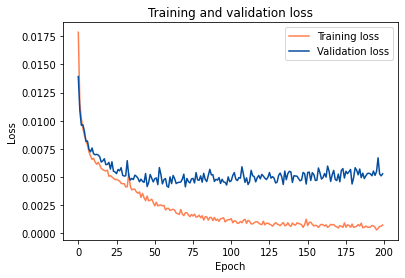

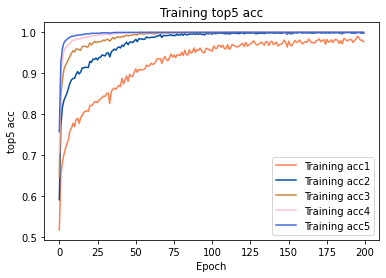

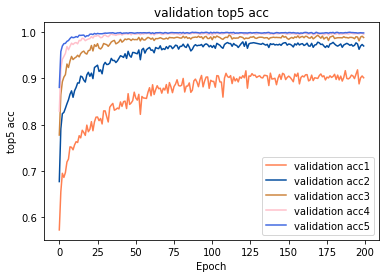

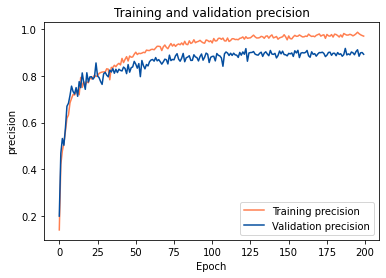

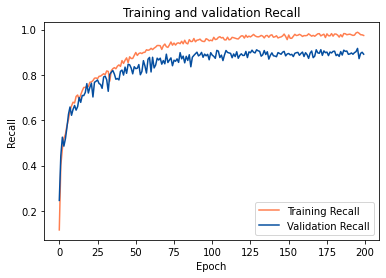

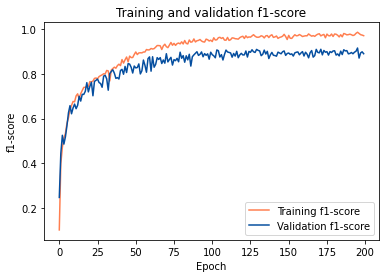

1636982081.890251


In [156]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(cnn, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

In [102]:
def test(capsule_net, test_loader):
    '''打印给定胶囊网络的测试统计数据。
       参数capsule_net：训练好的胶囊网络
       参数 test_loader：测试数据加载器
       return：返回最后一批测试图像数据和对应的重建
       '''
    #------计算各类别的分类准确率--------------
#     # 最开始初始化为0
    classes = ['0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9', '10', '11', '12', '13','14']
    class_correct = list(0. for i in range(16))
    
#     # 初始化为0
    class_total = list(0. for i in range(16))
    
    test_loss = 0 # loss tracking
    correct, correct1, correct2, correct3, correct4, correct5 = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
    test_acc1, test_acc2, test_acc3, test_acc4, test_acc5 = 0.0, 0.0, 0.0, 0.0, 0.0
    precision, recall, f1 = 0.0, 0.0, 0.0
    test_preds = []
    test_trues = []
    
    preds = []
    trues = []
    
    count = 0
    # 模型的结构
    capsule_net.eval() # eval mode

    for batch_i, (data, target) in enumerate(test_loader):
        # target: torch.Size([20, 10])
        data = data.unsqueeze(0)
        data = data.permute(1,2,0)
        target = target.squeeze()
#         target = One_hot(target)
        # 转tensor，batch_labels: torch.Size([32, 16])
#         target = torch.from_numpy(target) 
        target = target.type(torch.LongTensor)
        
        batch_size = data.size(0)

#         if TRAIN_ON_GPU:
#             images, target = images.cuda(), target.cuda()

        # forward pass: compute predicted outputs by passing inputs to the model
        logits = cnn(data)
        
                    
            # calculate loss
        loss = criterion(logits, target)

        # update average test loss 
        test_loss += loss.item()
        
        
        target = One_hot(target)
        target = torch.from_numpy(target)
        
        # 计算AUC，绘制AUC曲线
        preds.append(logits.cpu().detach().numpy())
        trues.append(target.cpu().detach().numpy())
        
        # 计算topk准确率，k=1-5
        _, pred = logits.topk(5, 1, largest=True, sorted=True)
        _, labels = torch.max(target.data.cpu(), 1)
        _, labels1 = torch.max(target.data.cpu(), 1)
        labels = labels.view(labels.size(0), -1).expand_as(pred)
        
#         print("topk k pred:", pred)
#         print("topk k labels:", labels)
        
        count += labels.shape[0]
        correct = pred.eq(labels).float()
        correct5 += correct[:, :5].sum()
        correct4 += correct[:, :4].sum()
        correct3 += correct[:, :3].sum()
        correct2 += correct[:, :2].sum()
        correct1 += correct[:, :1].sum()
                
        #-----------计算precision、f1-score、recall--------------
        _, output = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
        _, label = torch.max(target.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
        test_trues.append(label.cpu().detach().numpy())
        test_preds.append(output.cpu().detach().numpy())
        
        correct = np.squeeze(output.eq(label.data.view_as(output)))
#         print("correct:", correct)
#         print(label.data[i])
        for i in range(batch_size):
            test_label = label.data[i]
#             print("test_label:", test_label)
            class_correct[test_label] +=  correct[i].item()
            class_total[test_label] += 1
        
    test_acc1 = correct1/count
    test_acc2 = correct2/count
    test_acc3 = correct3/count
    test_acc4 = correct4/count
    test_acc5 = correct5/count
    
    y_true = np.concatenate(test_trues)
    y_pred = np.concatenate(test_preds)
    
#     print("y_true:", y_true)
#     print("y_pred:", y_pred)
    
    ans = classification_report(y_true, y_pred,digits=5) # 小数点后保留5位有效数字
    print("测试集各标签分类情况：")
    print(ans)
    
    #---------各标签分类准确率------------
    for i in range(16):
        if class_total[i]>0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
     
    precision, recall, f1 = precision_recall_fscore_support(y_true,y_pred,average='macro')[:-1]
#         val_AUC = roc_auc_score(y_val_true, y_val_preds, multi_class='ovo')
    test_loss = test_loss/len(test_loader)
    test_loss = test_loss/100.0
    print('test Loss: {:.4f} \t'.format(test_loss))
    print('test acc1: {:.4f} \t'.format(test_acc1))
    print('test acc2: {:.4f} \t'.format(test_acc2))
    print('test acc3: {:.4f} \t'.format(test_acc3))
    print('test acc4: {:.4f} \t'.format(test_acc4))
    print('test acc5: {:.4f} \t'.format(test_acc5))
    print('test precision: {:.4f} \t test recall: {:.4f} \t test f1-score: {:.4f}'.format(precision, recall, f1))
    
    preds = np.array(preds)
    preds = preds.reshape(2800, 16)
#     print("preds:", preds)
    
    trues = np.array(trues)
    trues = trues.reshape(2800, 16)
#     print("trues:", trues)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict() 
    n_classes = 16

    #compute fpr and tpr with roc_curve from the ytest true labels to the scores
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(trues[:, i], preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # trues.ravel()合并为一行, (38400,)
    
    #---------------计算micro average roc_auc-----------------
    fpr["micro"], tpr["micro"], _ = roc_curve(trues.ravel(), preds.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print("micro roc_auc:", roc_auc["micro"])
    
    #---------------计算macro average roc_auc-----------------
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
      # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
      # Finally average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    print("macro roc_auc:", roc_auc["macro"])
    
    colors = cycle(['blue', 'red', 'green', 'brown', 'purple', 'pink', 'orange', 'black', 'yellow', 'cyan', 'coral', 'crimson', 'darkgoldenrod', 'lavender', 'lime', 'gold'])
    class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
    
    plt.figure(figsize=(12,10))
    plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)
    
    #-------------画ROC曲线图------------------------
    for i, color, lbl in zip(range(n_classes), colors, class_labels):
        plt.plot(fpr[i], tpr[i], color = color, lw = 1.5,
        label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw = 2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for 16 Multi-Class Data')
    plt.legend(loc = 'lower right', prop = {'size': 9})
#     fullpath = save_plot_path.joinpath(save_plot_path.stem +'_roc_curve.png')
#     plt.savefig(fullpath)
    plt.show()
    

### fold0 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.93515   0.91492   0.92493      1387
           1    1.00000   1.00000   1.00000        69
           2    1.00000   0.92208   0.95946        77
           3    0.93976   1.00000   0.96894        78
           4    0.93333   0.95890   0.94595        73
           5    0.87059   0.89157   0.88095        83
           6    0.96296   0.89655   0.92857        87
           7    0.72289   0.85714   0.78431        70
           8    0.94681   0.91753   0.93194        97
           9    0.96053   1.00000   0.97987        73
          10    0.74766   0.87912   0.80808        91
          11    0.89474   1.00000   0.94444       136
          12    0.91304   0.92105   0.91703       114
          13    0.58716   0.54237   0.56388       118
          14    0.87121   0.87786   0.87452       131
          15    0.73874   0.70690   0.72247       116

    accuracy                        0.89750      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



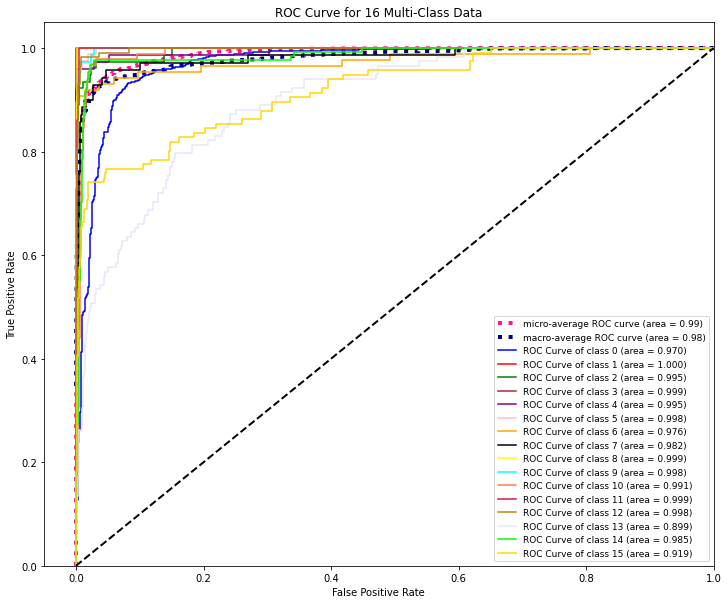

In [84]:
test(cnn, test_loader)

### fold1(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.93640   0.93441   0.93540      1418
           1    1.00000   1.00000   1.00000        82
           2    0.96053   0.89024   0.92405        82
           3    0.96512   0.96512   0.96512        86
           4    1.00000   0.91667   0.95652        84
           5    0.90588   0.90588   0.90588        85
           6    0.94444   0.95775   0.95105        71
           7    0.82812   0.73611   0.77941        72
           8    0.94667   1.00000   0.97260        71
           9    0.97701   1.00000   0.98837        85
          10    0.72043   0.89333   0.79762        75
          11    0.89516   1.00000   0.94468       111
          12    0.87179   0.91892   0.89474       111
          13    0.68687   0.50746   0.58369       134
          14    0.85714   0.99130   0.91935       115
          15    0.74783   0.72881   0.73820       118

    accuracy                        0.90786      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



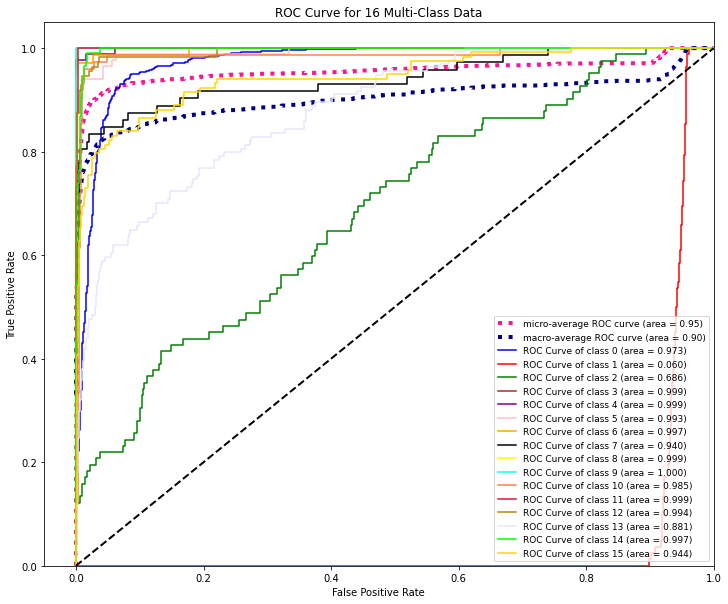

In [103]:
test(cnn, test_loader)

### fold2(test） 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.93388   0.91418   0.92393      1375
           1    1.00000   1.00000   1.00000        85
           2    1.00000   0.91250   0.95425        80
           3    0.93421   0.95946   0.94667        74
           4    0.95181   0.96341   0.95758        82
           5    0.86813   0.87778   0.87293        90
           6    0.97333   0.90123   0.93590        81
           7    0.85366   0.76923   0.80925        91
           8    0.91753   0.95699   0.93684        93
           9    0.98795   1.00000   0.99394        82
          10    0.68354   0.77143   0.72483        70
          11    0.94400   1.00000   0.97119       118
          12    0.85294   0.87218   0.86245       133
          13    0.57692   0.64655   0.60976       116
          14    0.86087   0.91667   0.88789       108
          15    0.77419   0.78689   0.78049       122

    accuracy                        0.89857      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



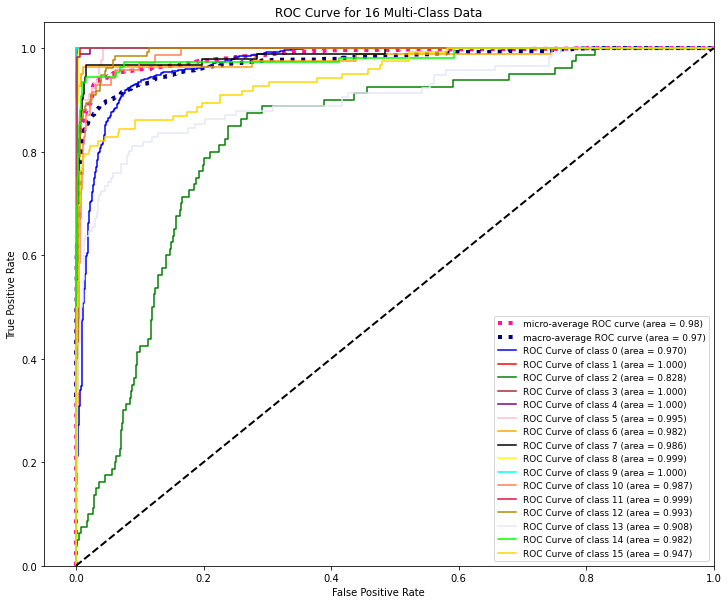

In [121]:
test(cnn, test_loader)

### fold3(test） 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.93018   0.93086   0.93052      1374
           1    1.00000   1.00000   1.00000        93
           2    1.00000   0.88889   0.94118        81
           3    0.97590   1.00000   0.98780        81
           4    0.93182   0.97619   0.95349        84
           5    0.98571   0.90789   0.94521        76
           6    0.96429   0.93103   0.94737        87
           7    0.82558   0.84524   0.83529        84
           8    0.90141   0.98462   0.94118        65
           9    0.92045   1.00000   0.95858        81
          10    0.83529   0.77174   0.80226        92
          11    0.90083   0.95614   0.92766       114
          12    0.85915   0.94574   0.90037       129
          13    0.62766   0.53153   0.57561       111
          14    0.86466   0.92000   0.89147       125
          15    0.73913   0.69106   0.71429       123

    accuracy                        0.90500      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



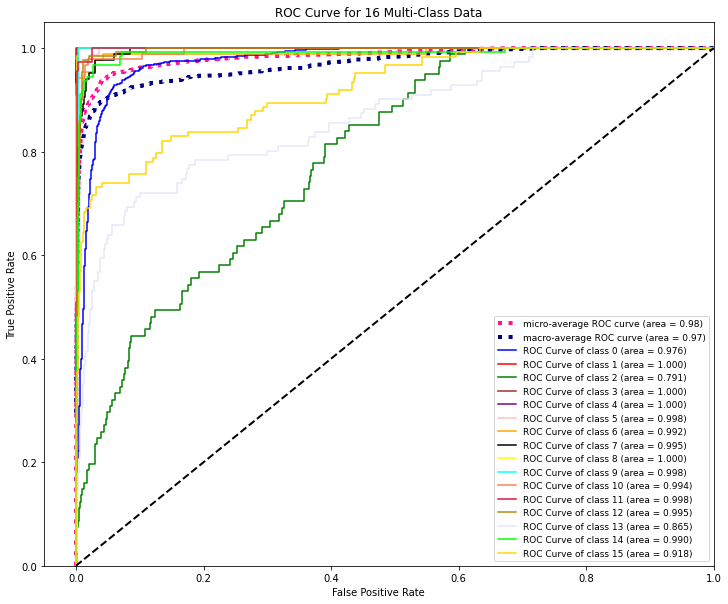

In [139]:
test(cnn, test_loader)

### fold4(test） 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.92616   0.92808   0.92712      1446
           1    0.98611   1.00000   0.99301        71
           2    1.00000   0.95000   0.97436        80
           3    1.00000   0.98765   0.99379        81
           4    0.95455   0.81818   0.88112        77
           5    0.93750   0.90909   0.92308        66
           6    0.98592   0.94595   0.96552        74
           7    0.73256   0.75904   0.74556        83
           8    0.90000   0.97297   0.93506        74
           9    0.98750   1.00000   0.99371        79
          10    0.81944   0.81944   0.81944        72
          11    0.94215   0.94215   0.94215       121
          12    0.85600   0.94690   0.89916       113
          13    0.64754   0.65289   0.65021       121
          14    0.86555   0.85124   0.85833       121
          15    0.71795   0.69421   0.70588       121

    accuracy                        0.90071      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



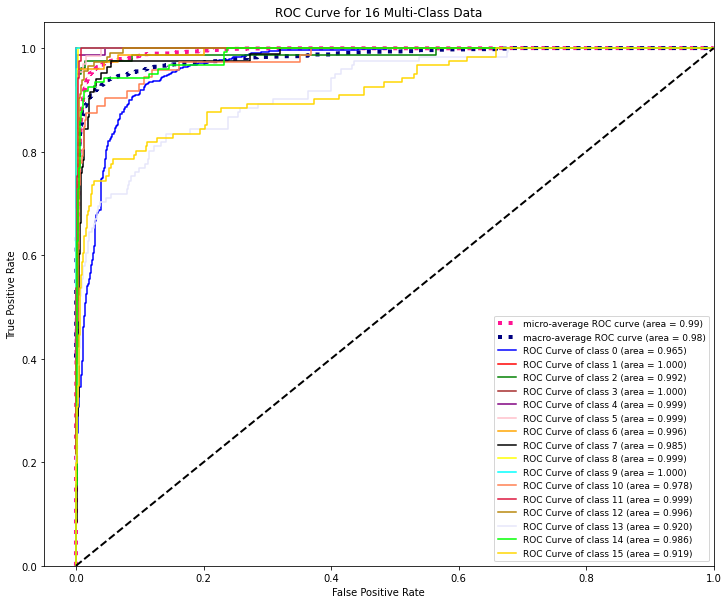

In [157]:
test(cnn, test_loader)